# Testing the posterior distribution

Test i want to perform:
- See if this method is sensitive to the size of $N_o$
- See if the algorithm improves with the number of interventional samples
- Interventional vs Observational samples
- Vary the simulated noise levels
- Vary the degree of edges for the graphs
- (Maybe try different graph structures)

In [1]:
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/")

from results_erdos.results_utils import plot_posterior_nobs

# Investigating the observational dataset size

# Erdos 5

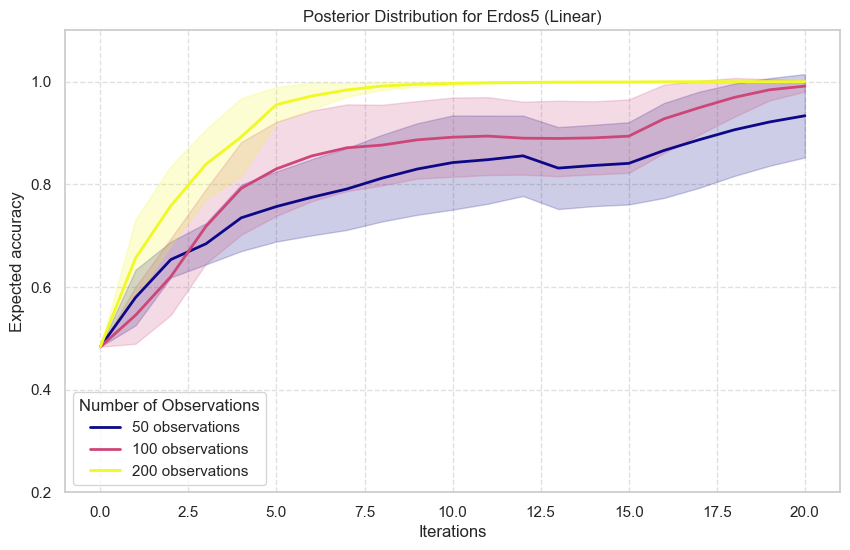

In [2]:
plot_posterior_nobs("Erdos5", experiment="accuracy")

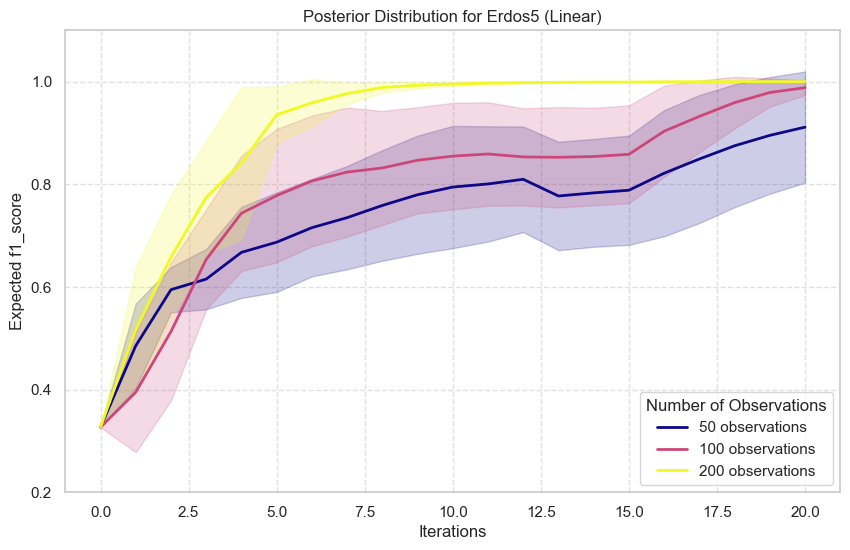

In [3]:
plot_posterior_nobs("Erdos5", experiment="f1_score")

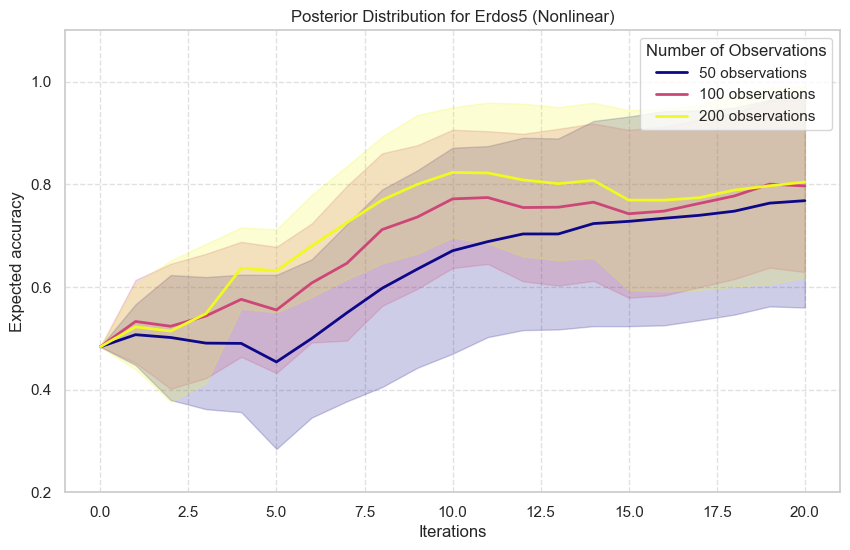

In [4]:
plot_posterior_nobs("Erdos5", experiment="accuracy", nonlinear=True)

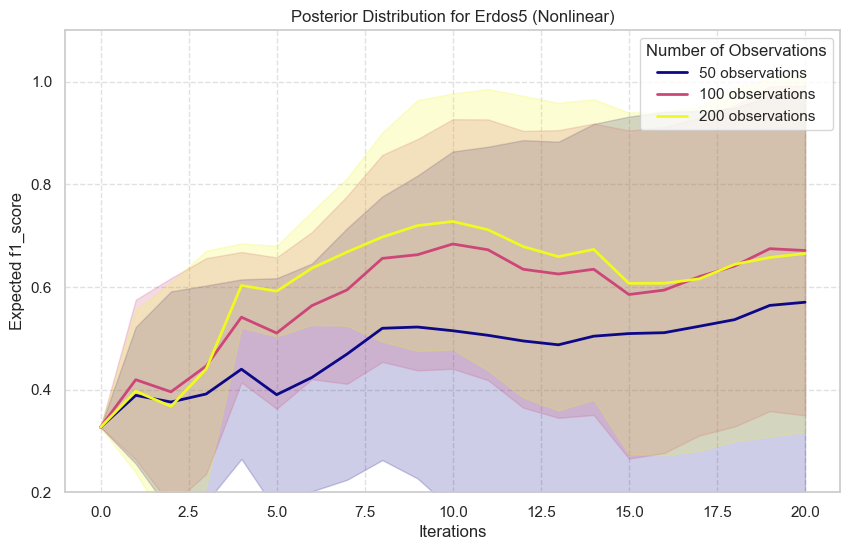

In [5]:
plot_posterior_nobs("Erdos5", experiment="f1_score", nonlinear=True)

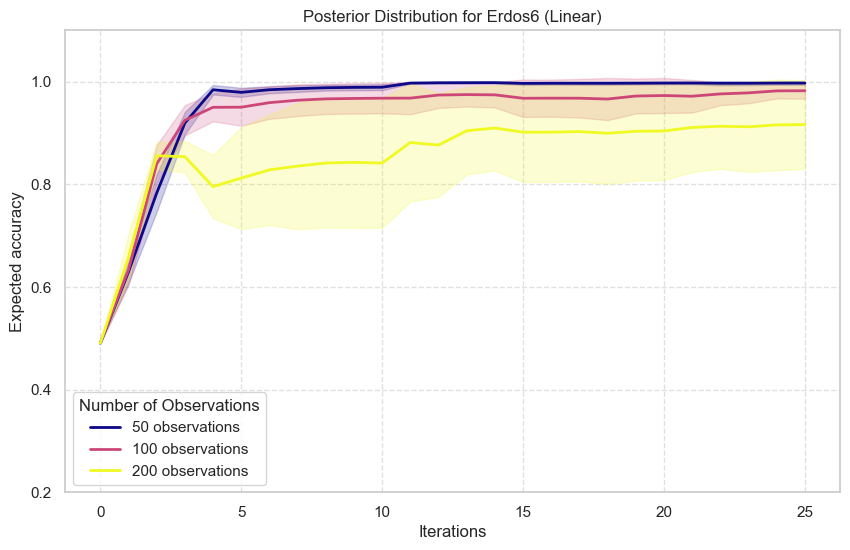

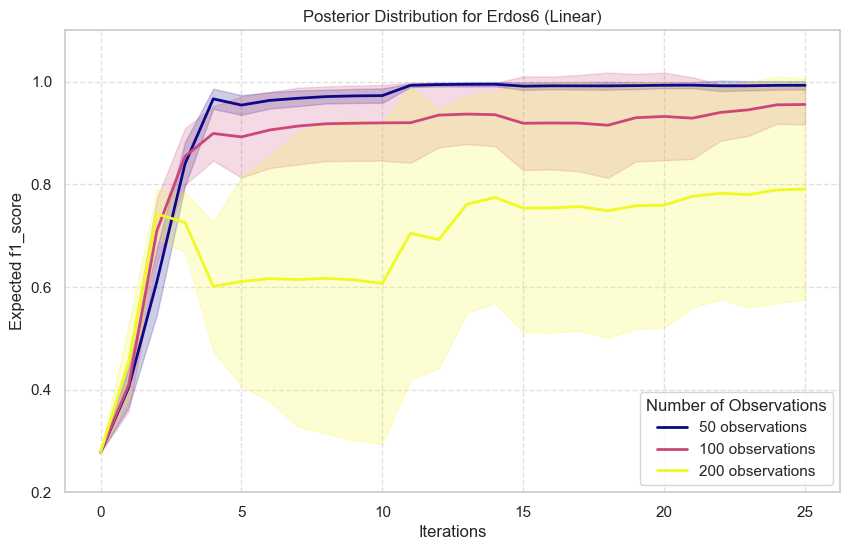

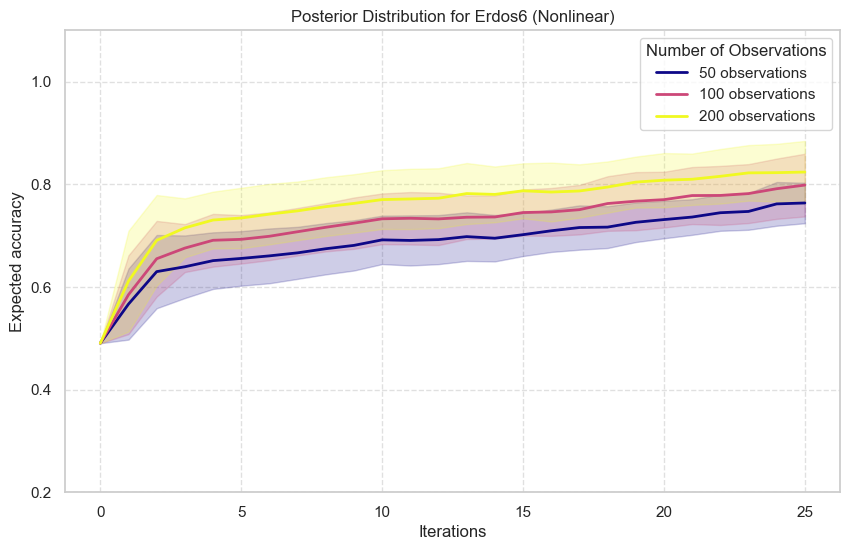

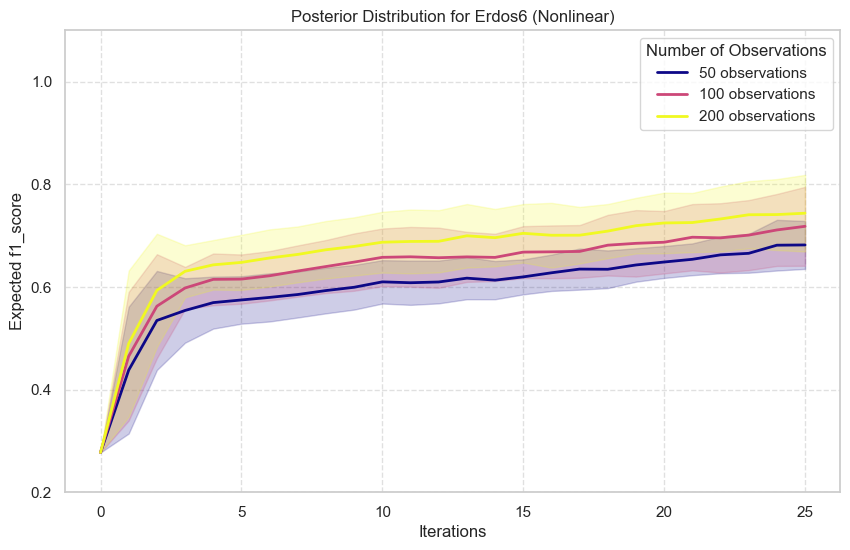

In [6]:
plot_posterior_nobs("Erdos6", experiment="accuracy")
plot_posterior_nobs("Erdos6", experiment="f1_score")
plot_posterior_nobs("Erdos6", experiment="accuracy", nonlinear=True)
plot_posterior_nobs("Erdos6", experiment="f1_score", nonlinear=True)

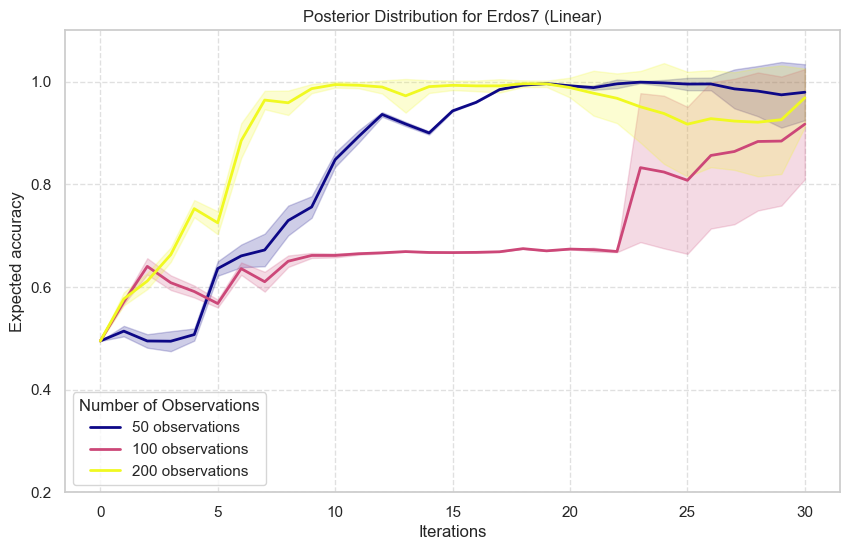

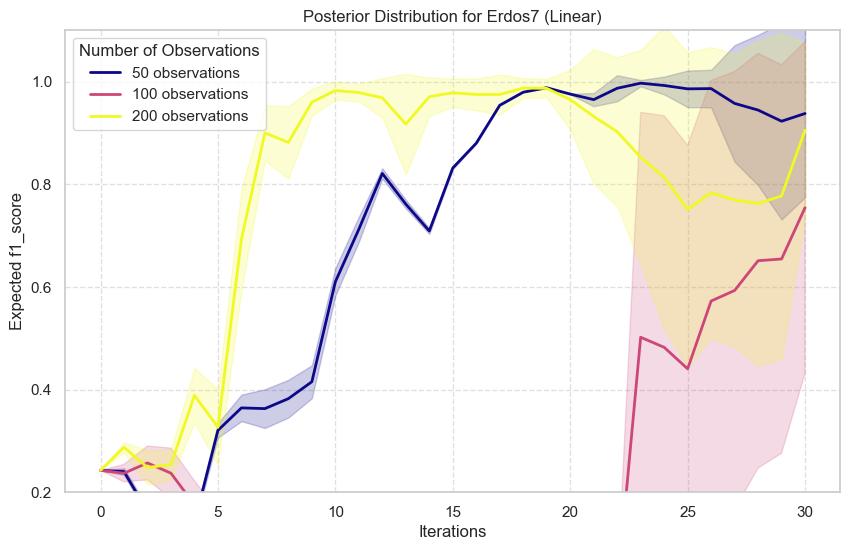

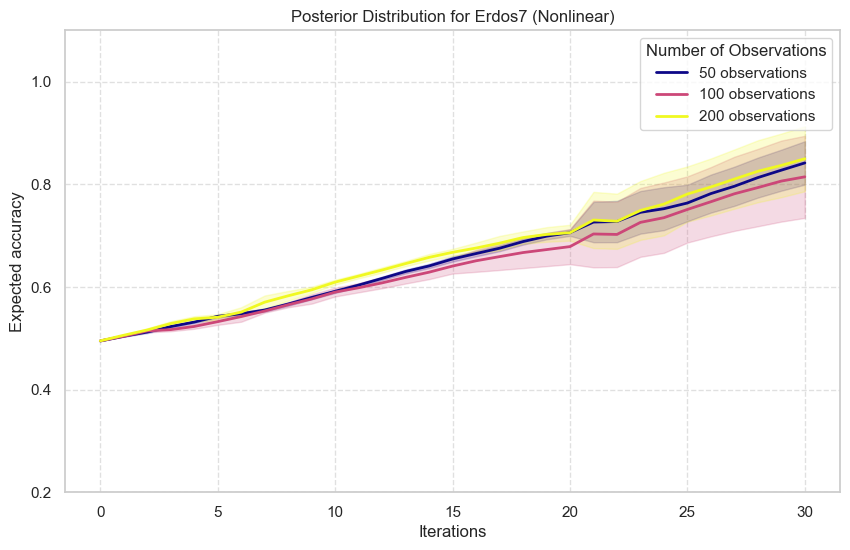

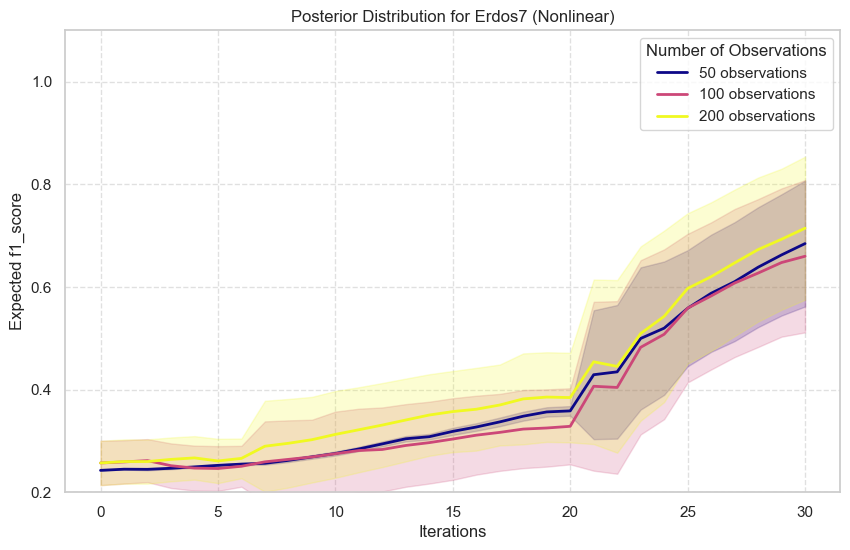

In [7]:
plot_posterior_nobs("Erdos7", experiment="accuracy")
plot_posterior_nobs("Erdos7", experiment="f1_score")
plot_posterior_nobs("Erdos7", experiment="accuracy", nonlinear=True)
plot_posterior_nobs("Erdos7", experiment="f1_score", nonlinear=True)

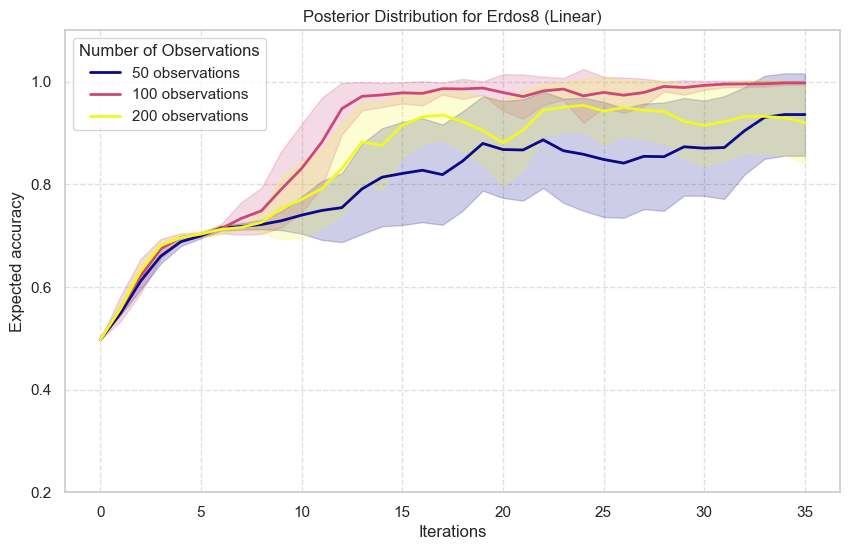

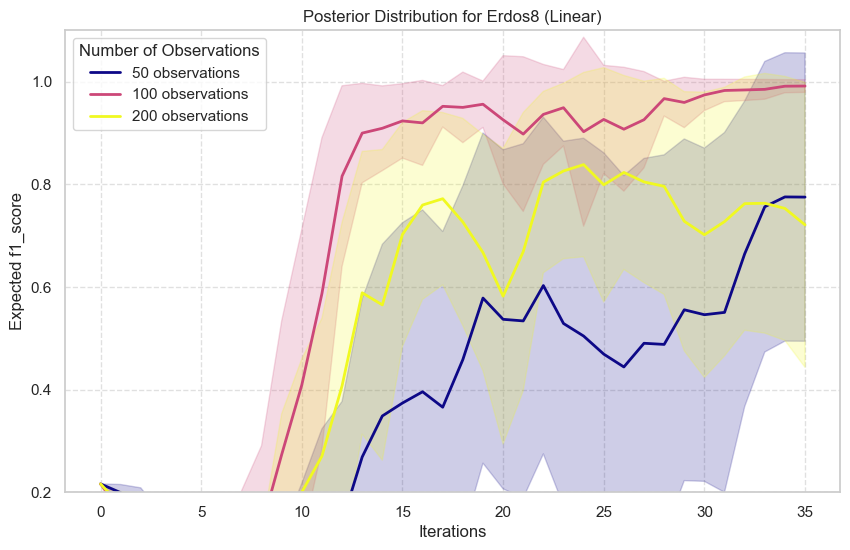

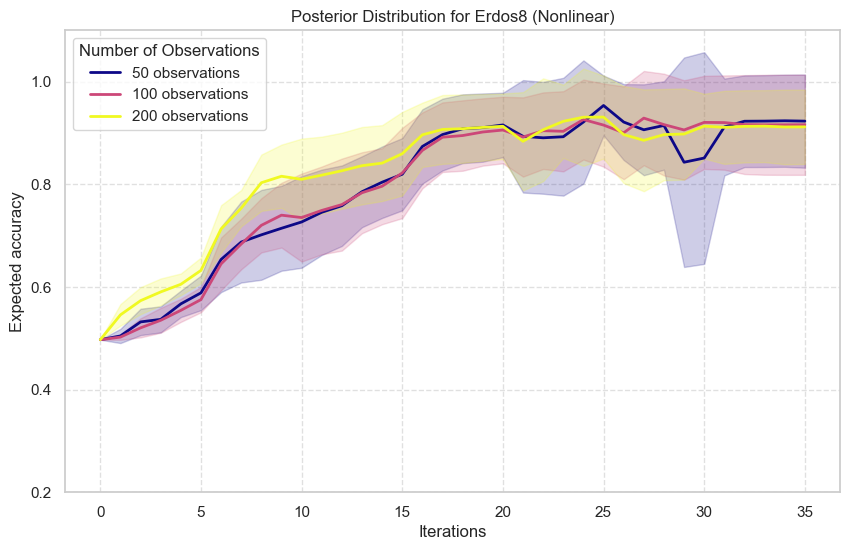

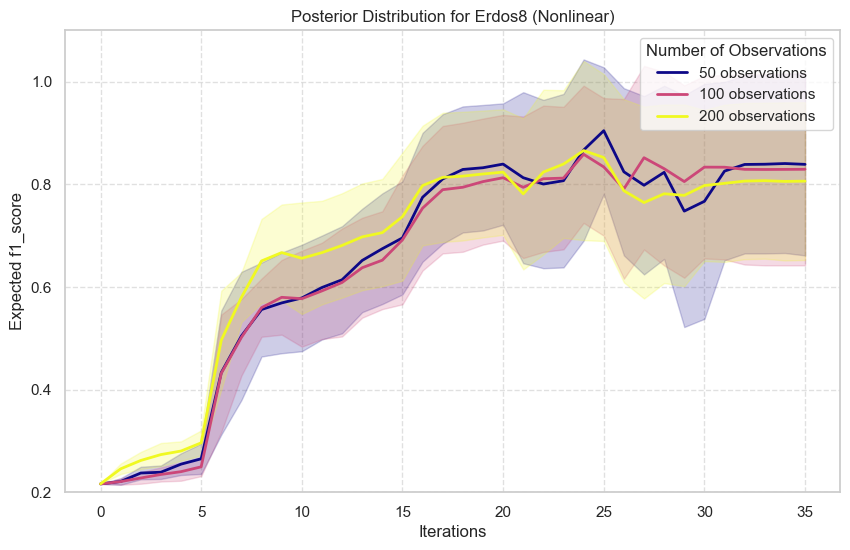

In [8]:
plot_posterior_nobs("Erdos8", experiment="accuracy")
plot_posterior_nobs("Erdos8", experiment="f1_score")
plot_posterior_nobs("Erdos8", experiment="accuracy", nonlinear=True)
plot_posterior_nobs("Erdos8", experiment="f1_score", nonlinear=True)

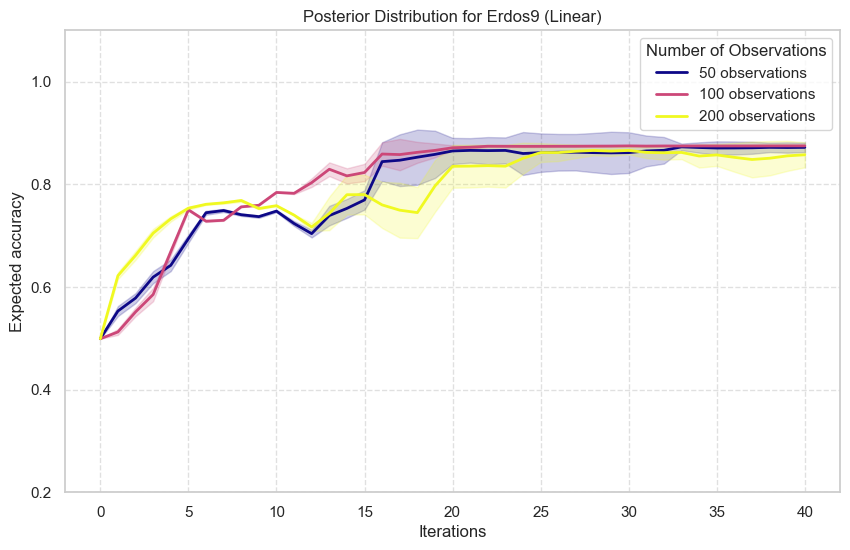

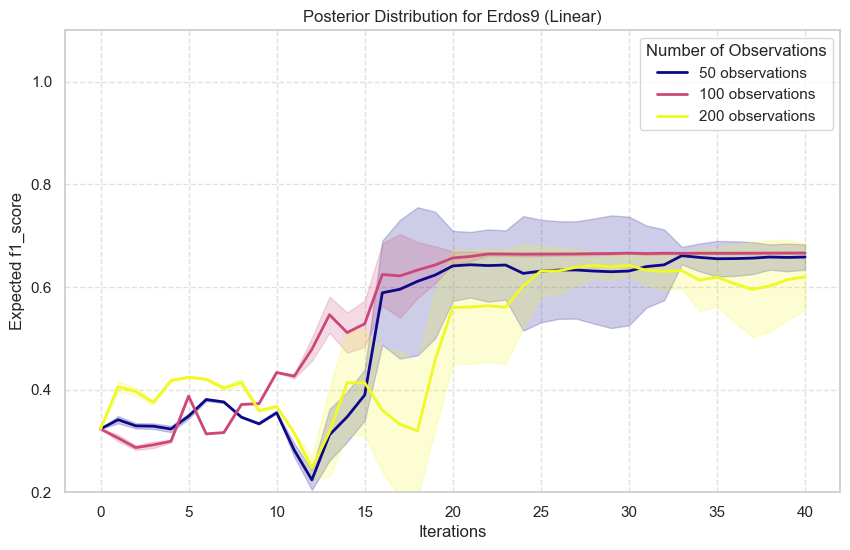

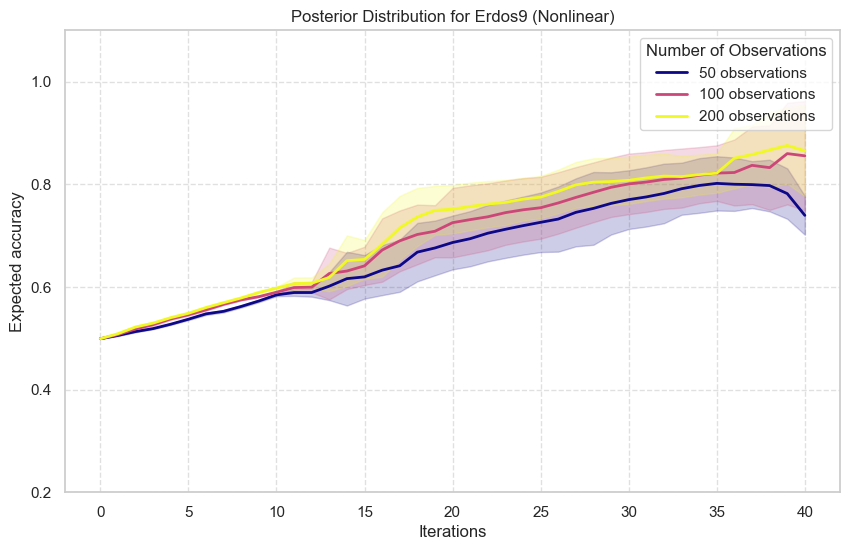

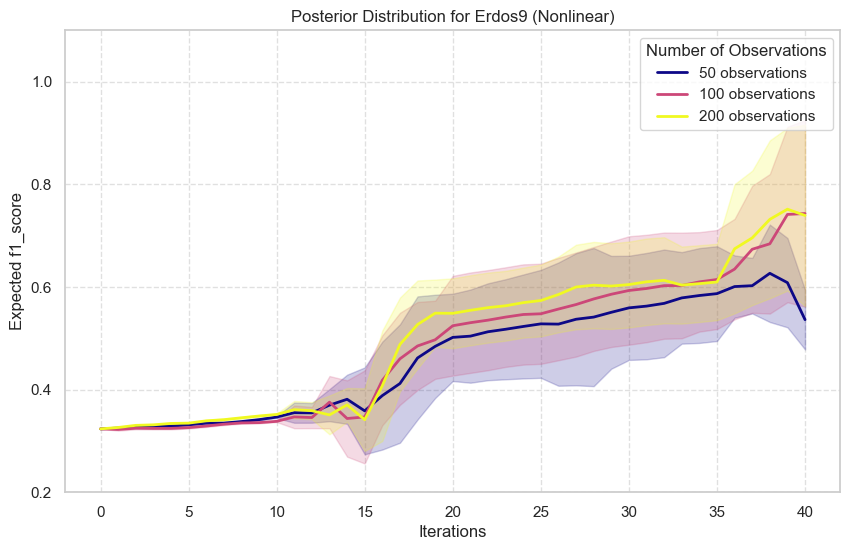

In [9]:
plot_posterior_nobs("Erdos9", experiment="accuracy")
plot_posterior_nobs("Erdos9", experiment="f1_score")
plot_posterior_nobs("Erdos9", experiment="accuracy", nonlinear=True)
plot_posterior_nobs("Erdos9", experiment="f1_score", nonlinear=True)

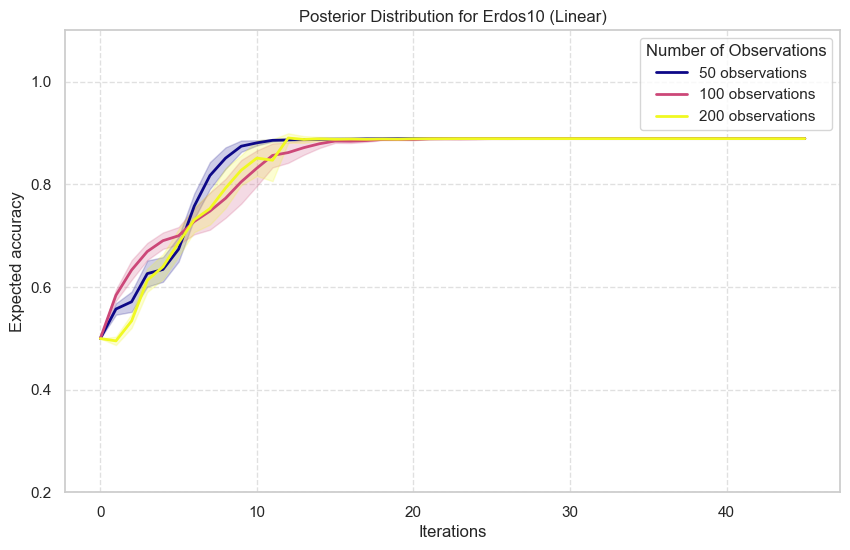

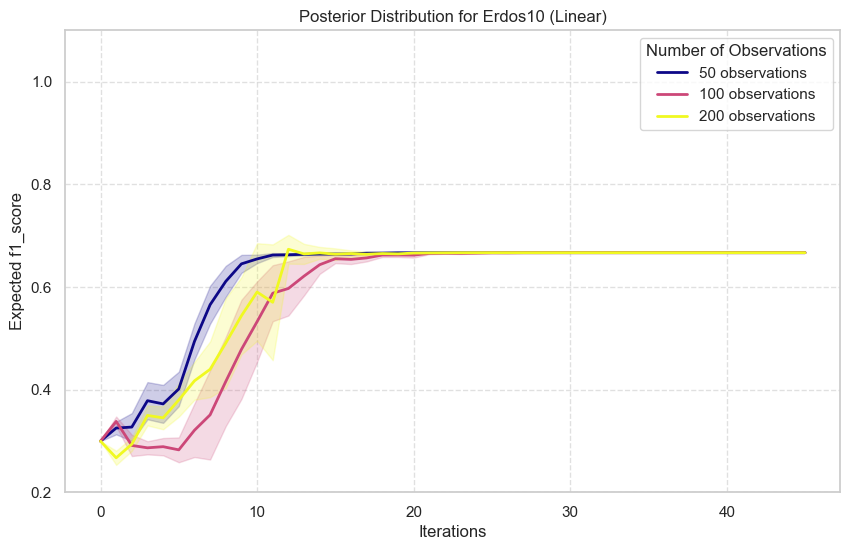

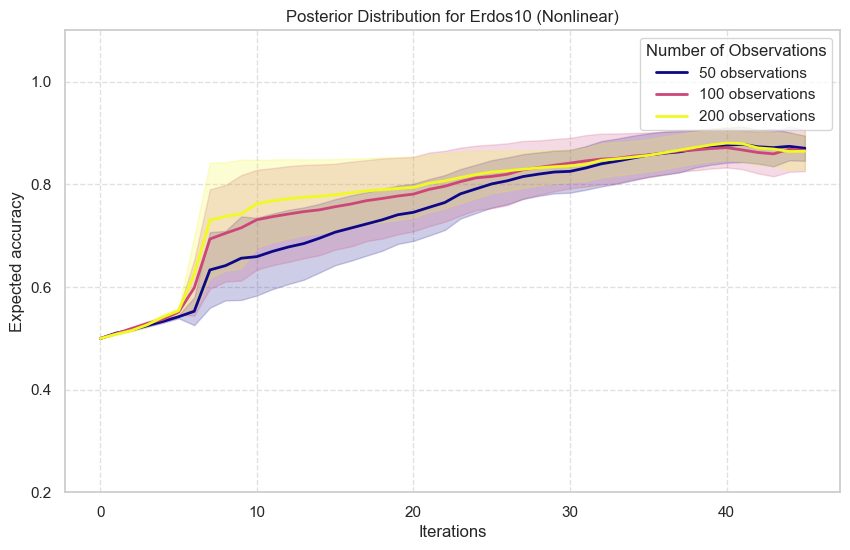

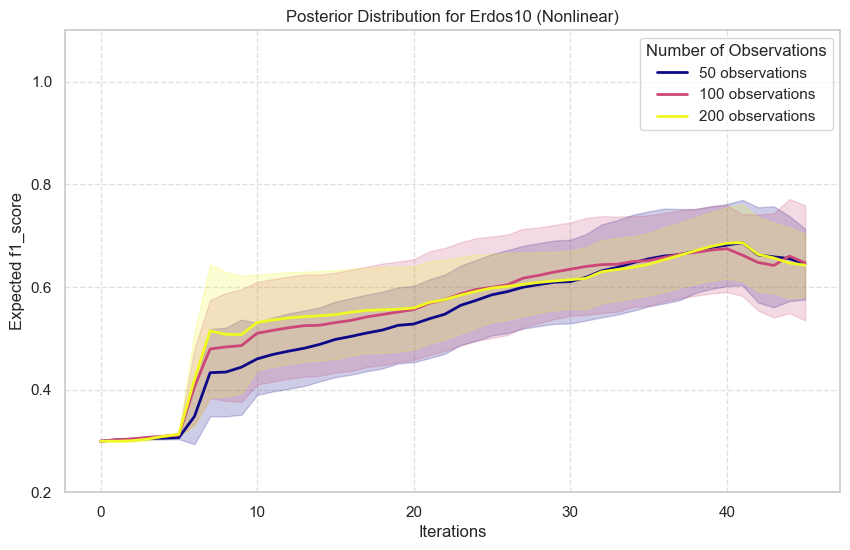

In [10]:
plot_posterior_nobs("Erdos10", experiment="accuracy")
plot_posterior_nobs("Erdos10", experiment="f1_score")
plot_posterior_nobs("Erdos10", experiment="accuracy", nonlinear=True)
plot_posterior_nobs("Erdos10", experiment="f1_score", nonlinear=True)

# Investigate the degree of the edges of the graph

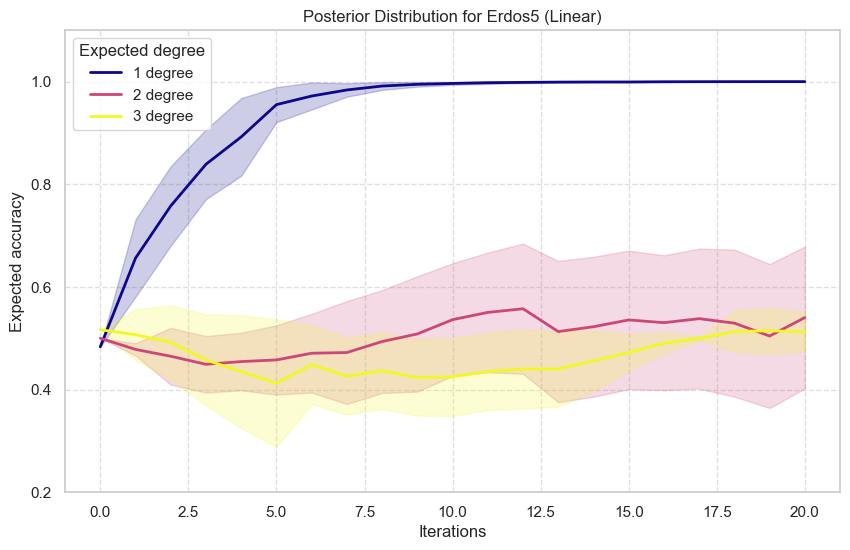

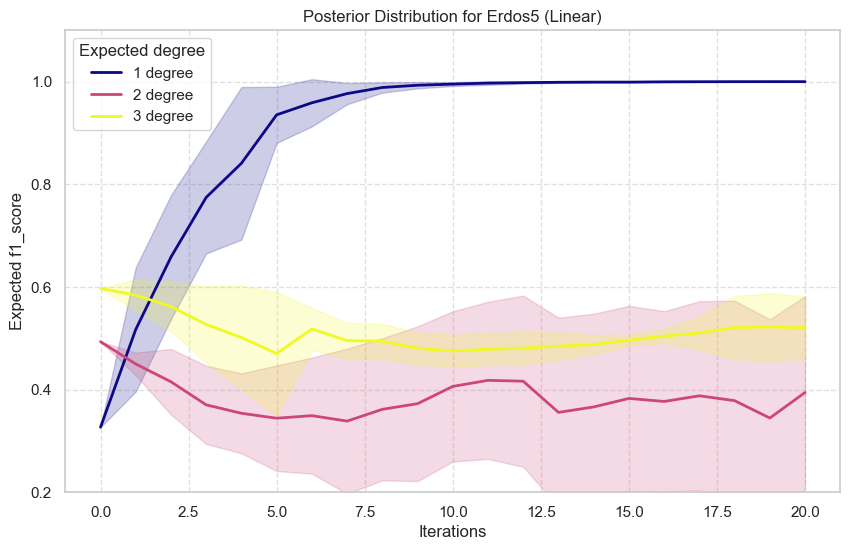

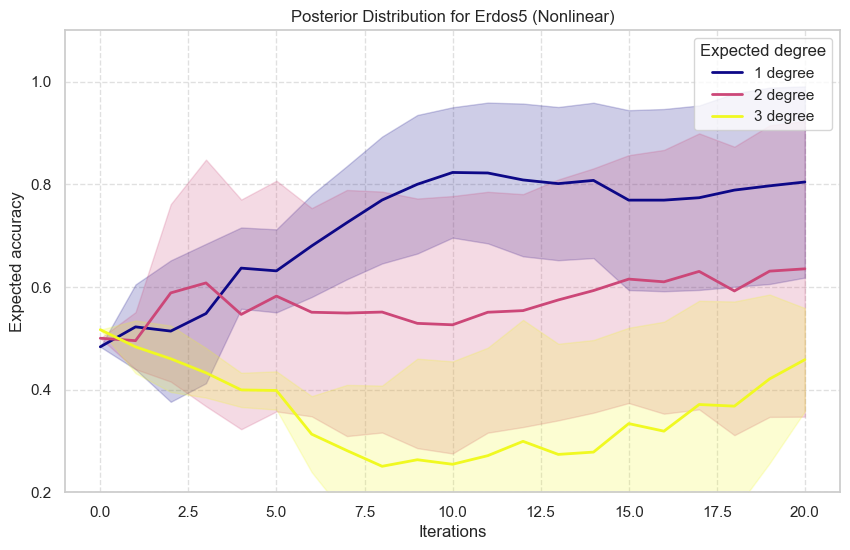

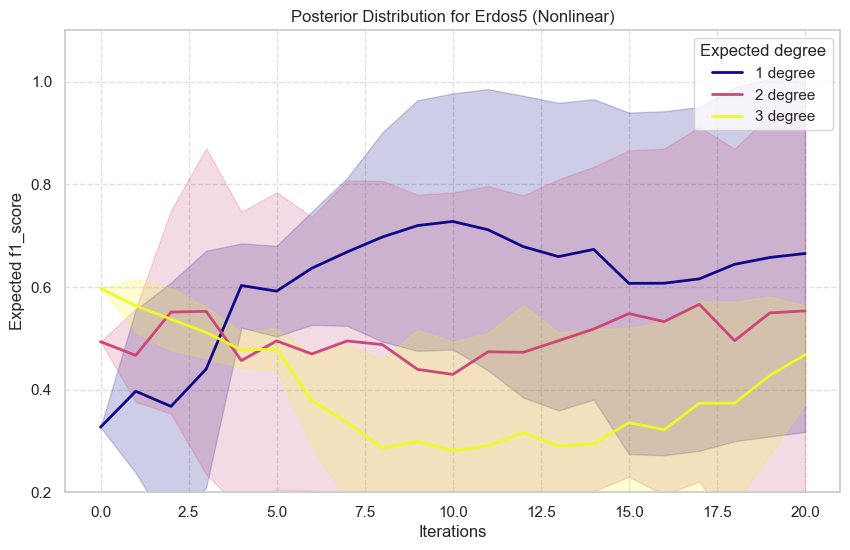

In [11]:
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/")

from results_erdos.results_utils import plot_posterior_p
plot_posterior_p("Erdos5", "accuracy", nonlinear=False)
plot_posterior_p("Erdos5", "f1_score", nonlinear=False)
plot_posterior_p("Erdos5", "accuracy", nonlinear=True)
plot_posterior_p("Erdos5", "f1_score", nonlinear=True)

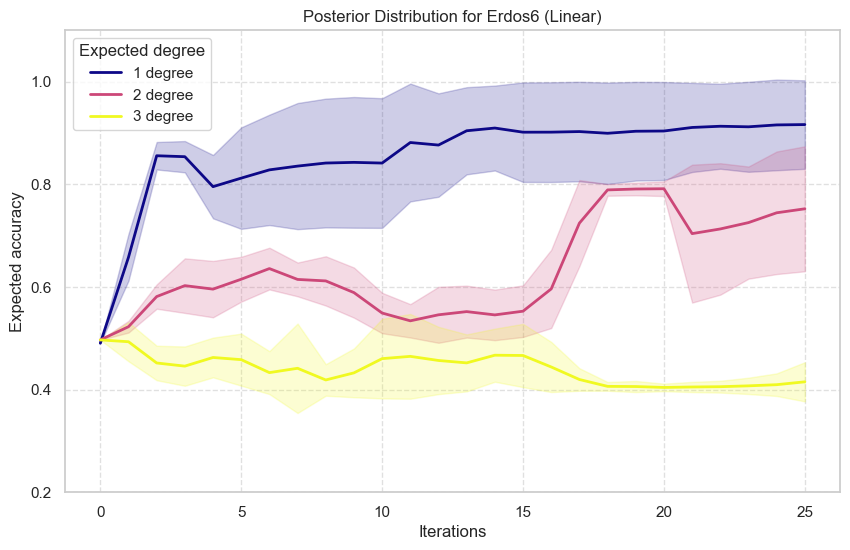

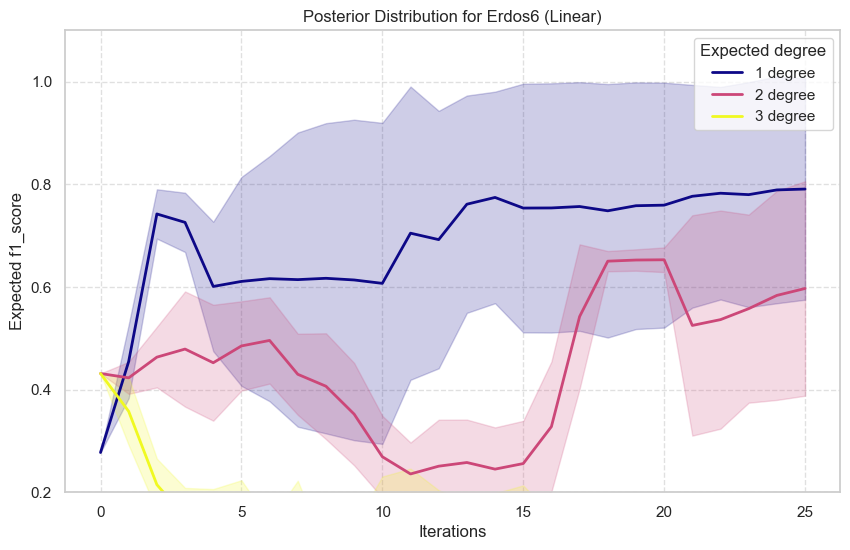

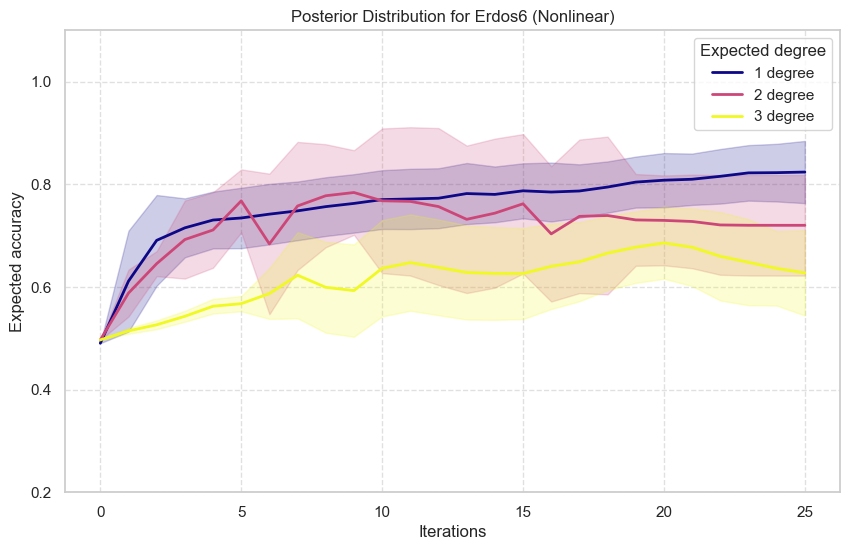

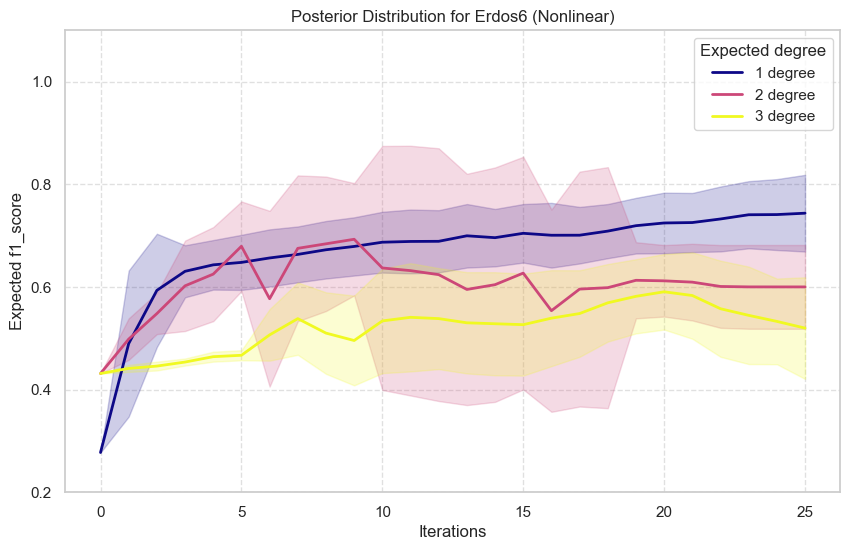

In [12]:
plot_posterior_p("Erdos6", "accuracy", nonlinear=False)
plot_posterior_p("Erdos6", "f1_score", nonlinear=False)
plot_posterior_p("Erdos6", "accuracy", nonlinear=True)
plot_posterior_p("Erdos6", "f1_score", nonlinear=True)

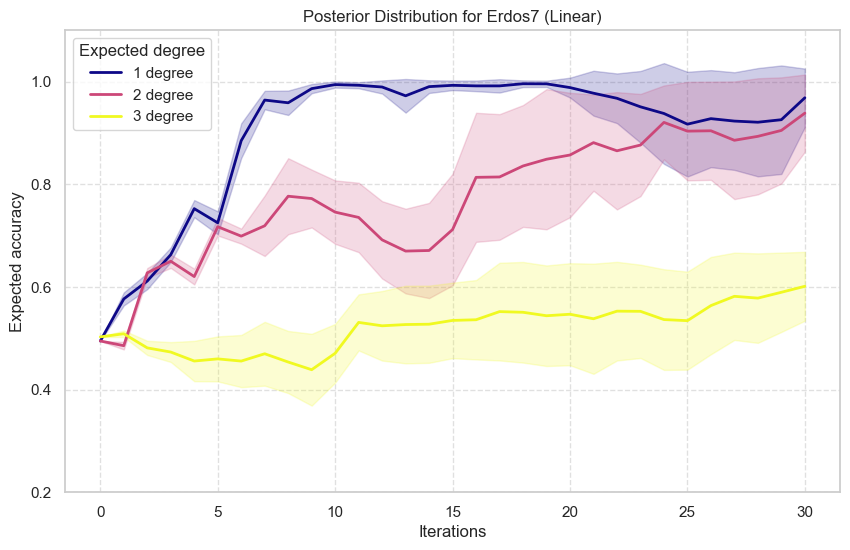

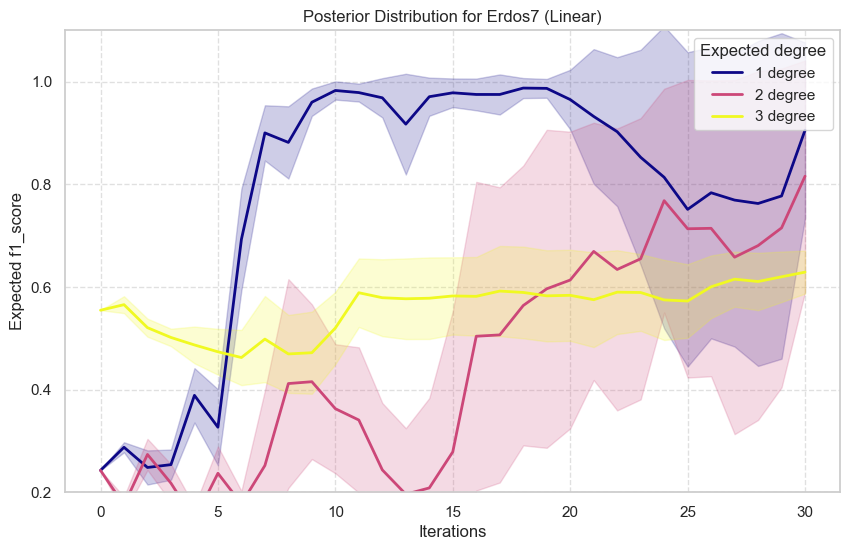

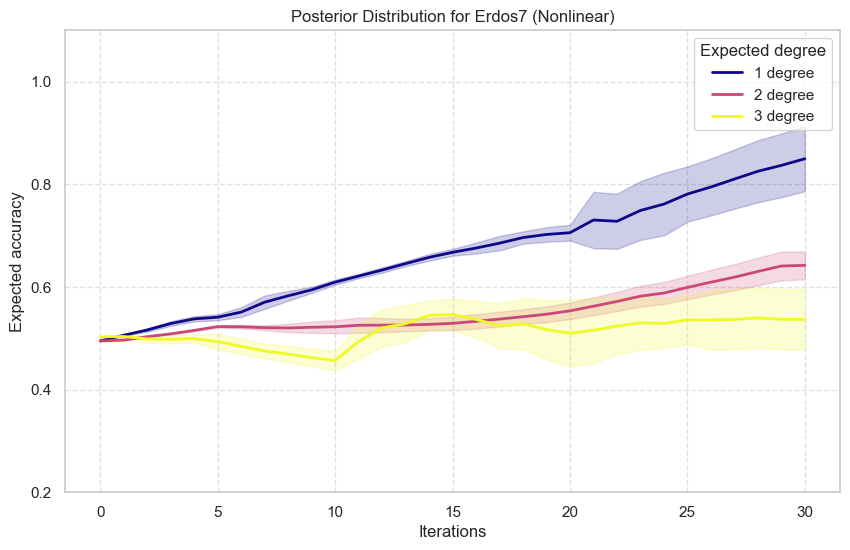

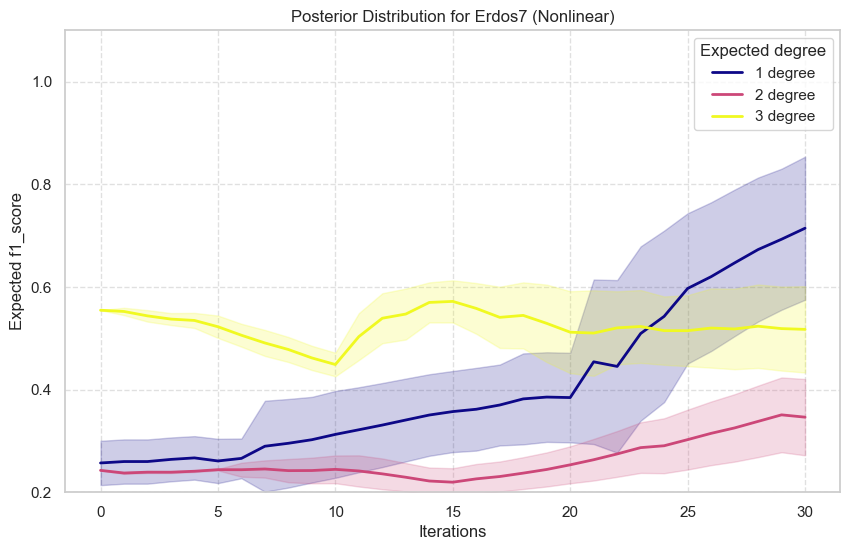

In [13]:
plot_posterior_p("Erdos7", "accuracy", nonlinear=False)
plot_posterior_p("Erdos7", "f1_score", nonlinear=False)
plot_posterior_p("Erdos7", "accuracy", nonlinear=True)
plot_posterior_p("Erdos7", "f1_score", nonlinear=True)

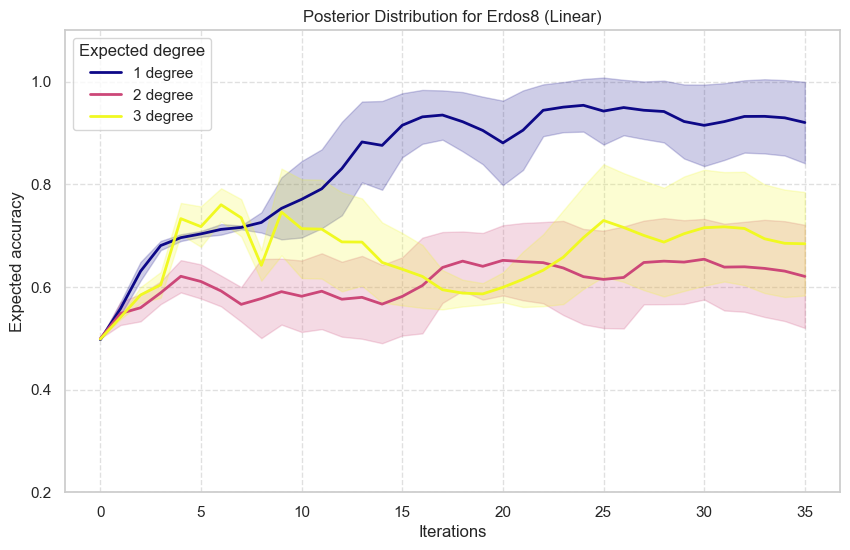

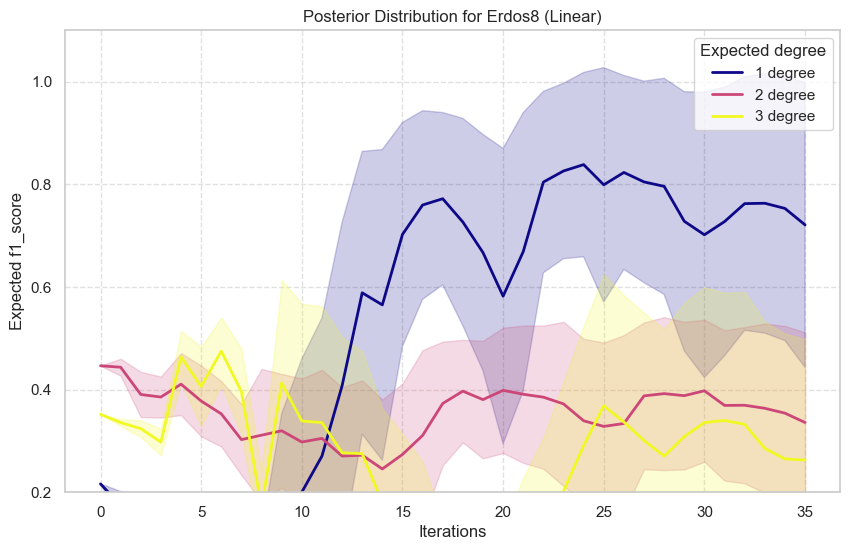

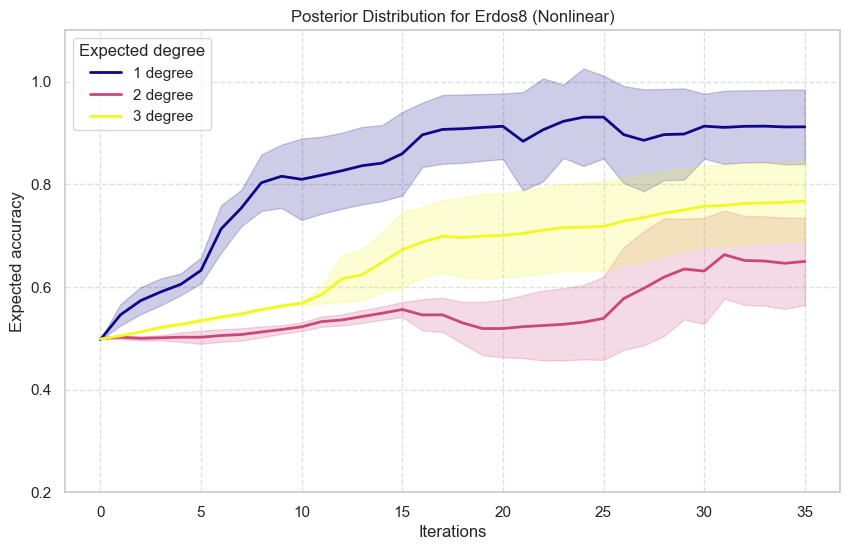

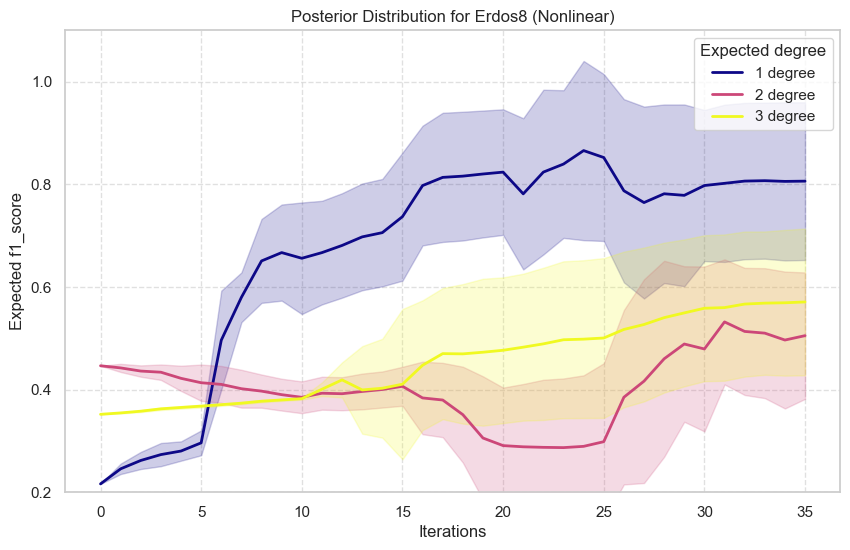

In [14]:
plot_posterior_p("Erdos8", "accuracy", nonlinear=False)
plot_posterior_p("Erdos8", "f1_score", nonlinear=False)
plot_posterior_p("Erdos8", "accuracy", nonlinear=True)
plot_posterior_p("Erdos8", "f1_score", nonlinear=True)

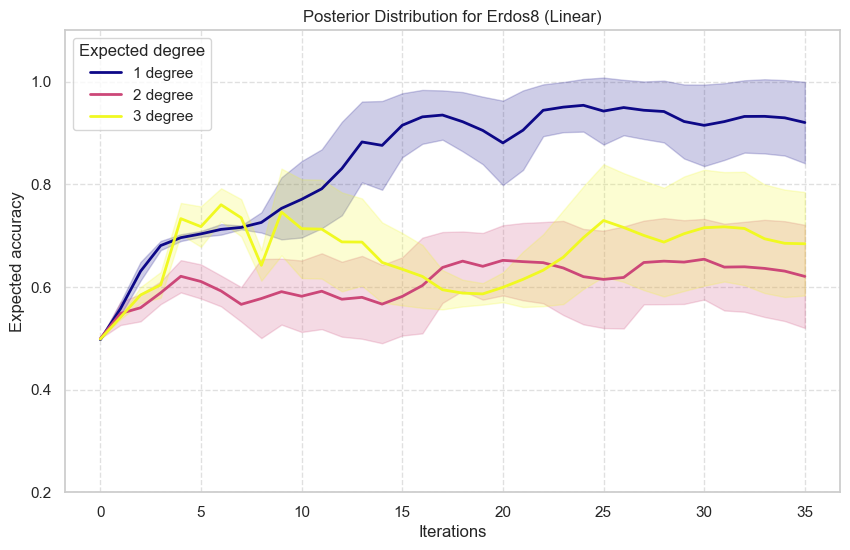

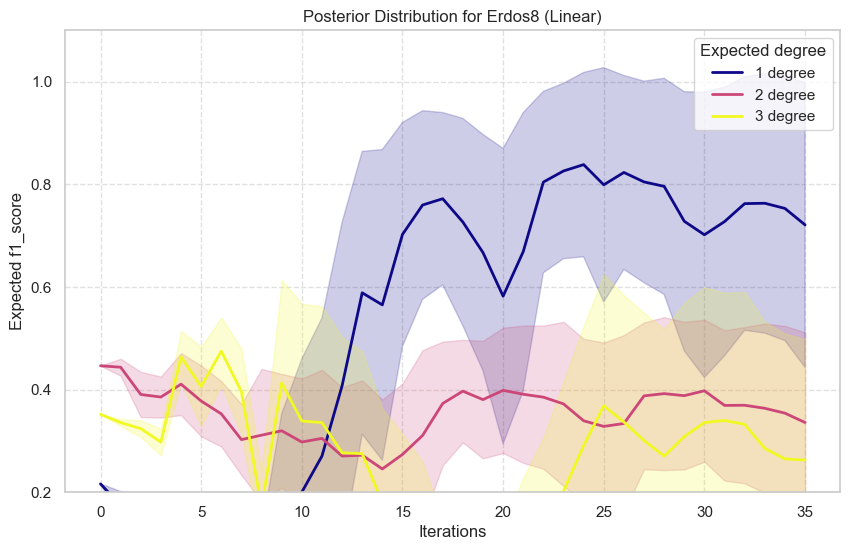

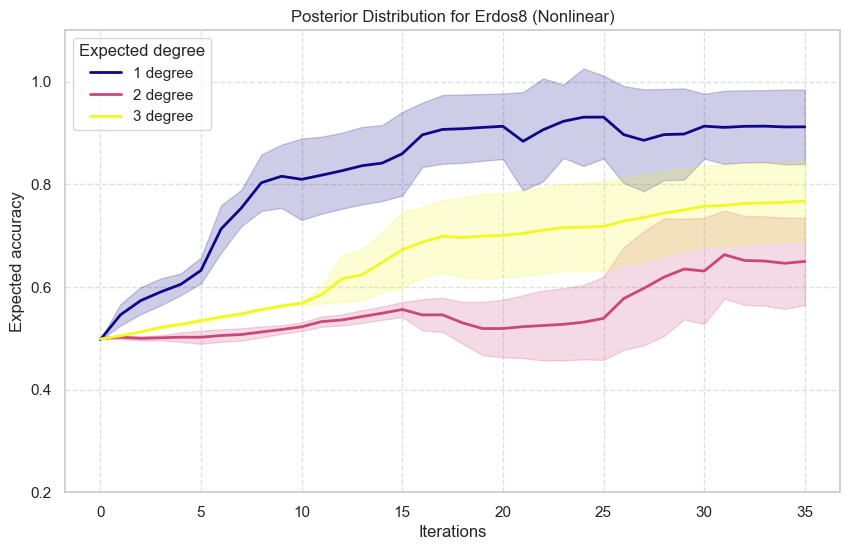

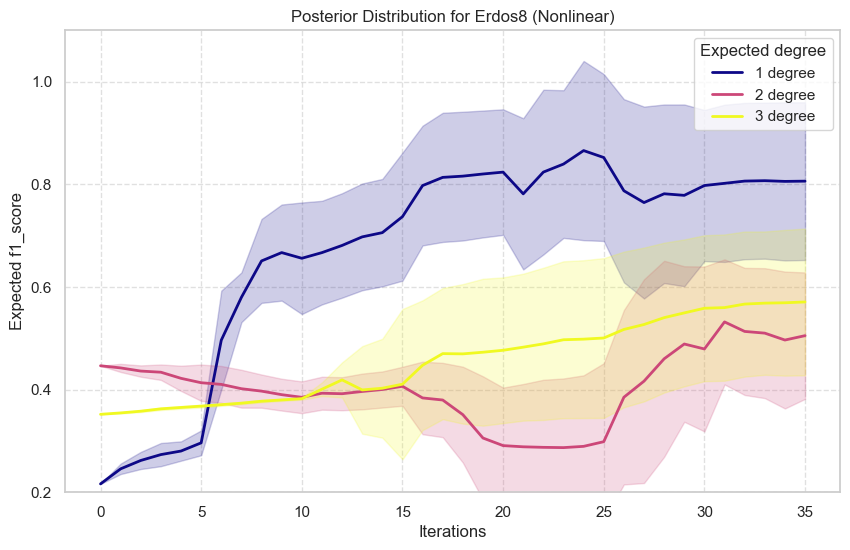

In [15]:
plot_posterior_p("Erdos8", "accuracy", nonlinear=False)
plot_posterior_p("Erdos8", "f1_score", nonlinear=False)
plot_posterior_p("Erdos8", "accuracy", nonlinear=True)
plot_posterior_p("Erdos8", "f1_score", nonlinear=True)

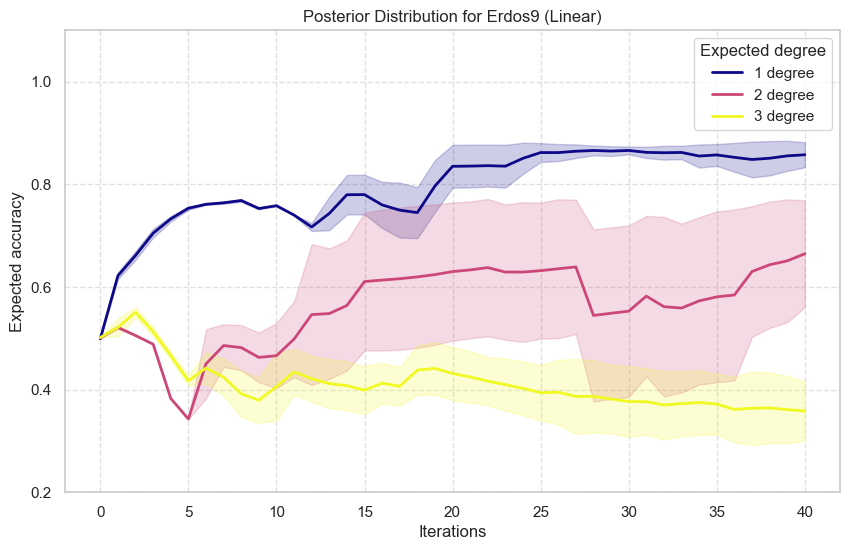

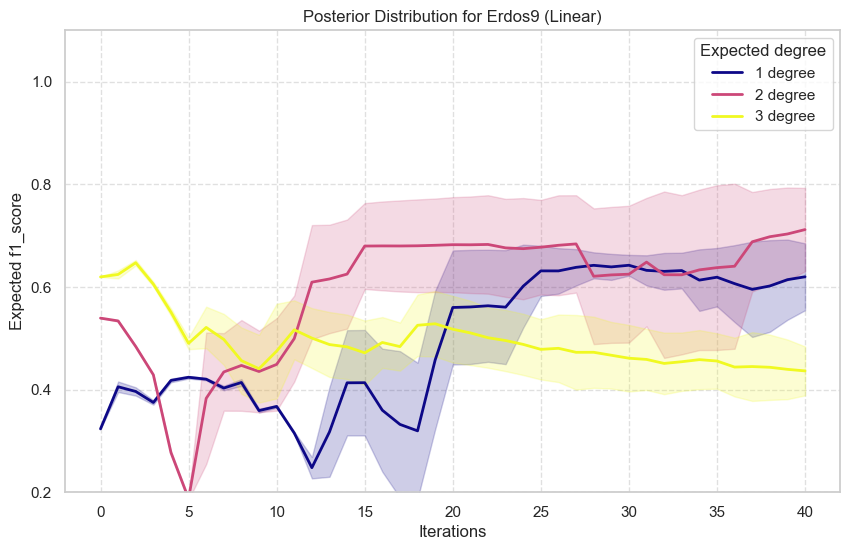

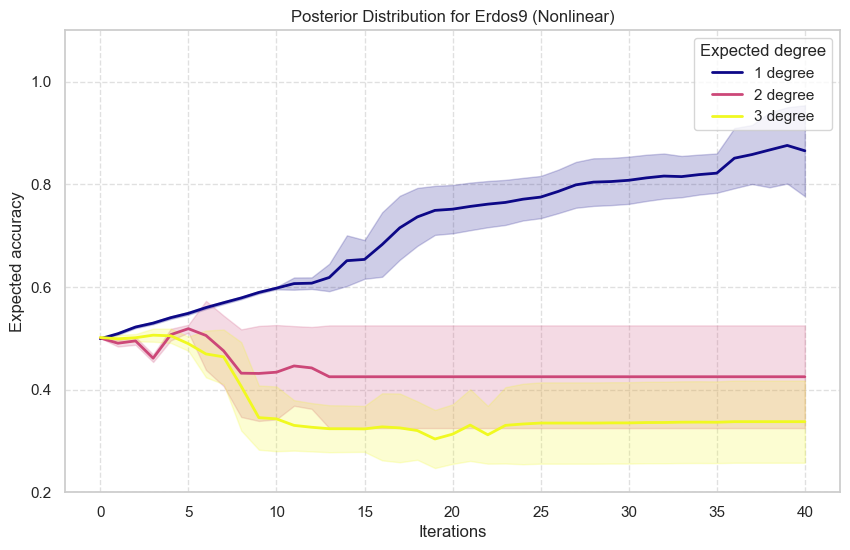

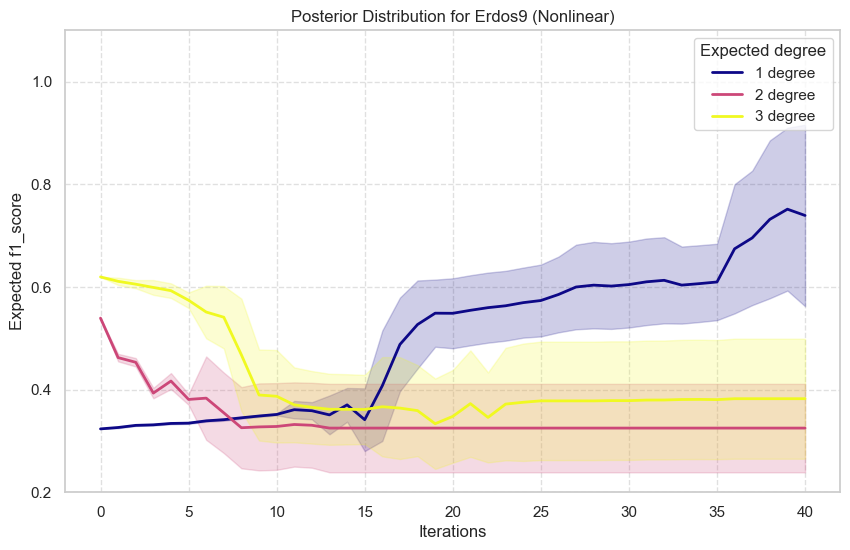

In [16]:
plot_posterior_p("Erdos9", "accuracy", nonlinear=False)
plot_posterior_p("Erdos9", "f1_score", nonlinear=False)
plot_posterior_p("Erdos9", "accuracy", nonlinear=True)
plot_posterior_p("Erdos9", "f1_score", nonlinear=True)

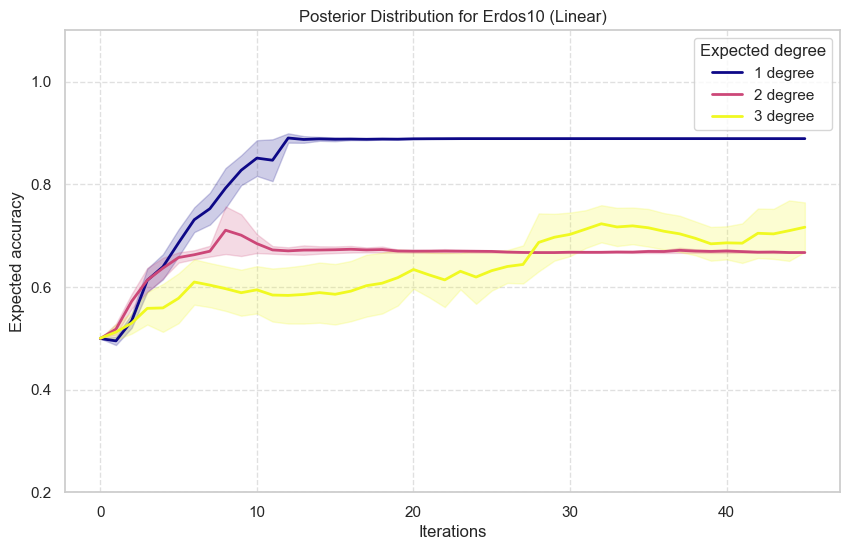

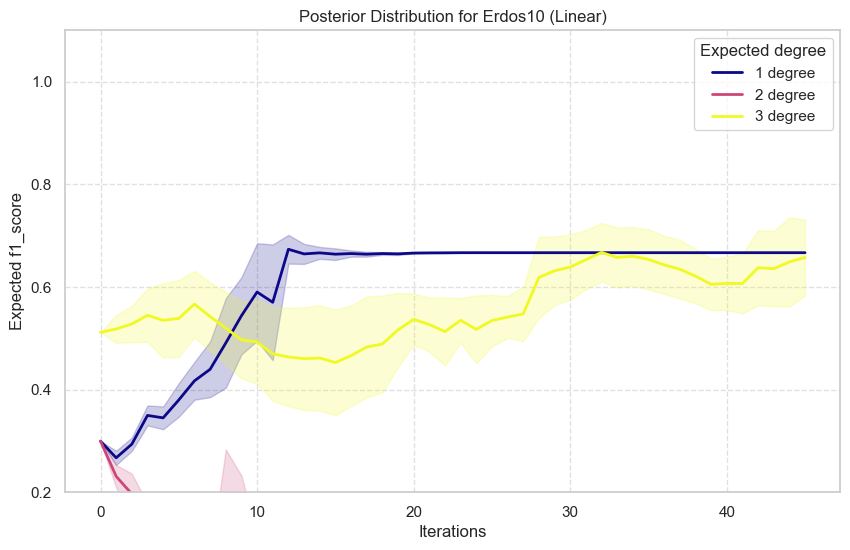

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (11,) + inhomogeneous part.

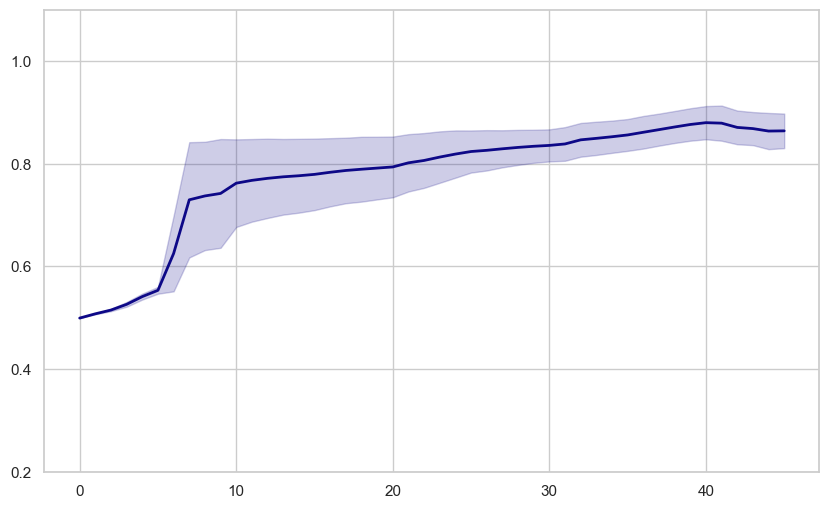

In [17]:
plot_posterior_p("Erdos10", "accuracy", nonlinear=False)
plot_posterior_p("Erdos10", "f1_score", nonlinear=False)
plot_posterior_p("Erdos10", "accuracy", nonlinear=True)
plot_posterior_p("Erdos10", "f1_score", nonlinear=True)

# Observational vs interventional data

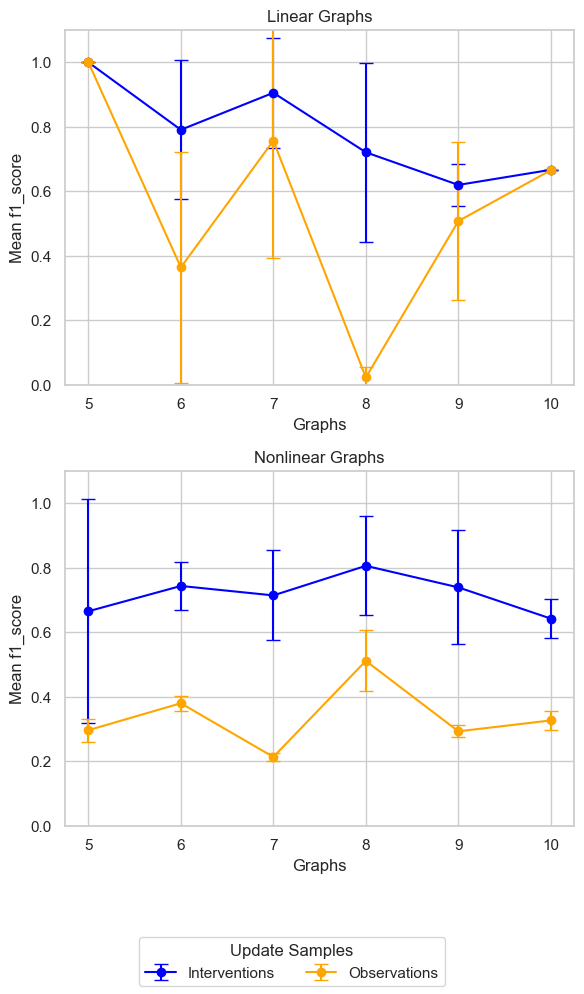

In [1]:
import os
from results_utils import load_results
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def summarise_obs_vs_int(statistic="accuracy"):
    sns.set_theme(style="whitegrid")
    graphs = [5, 6, 7, 8, 9, 10]
    used_interventions = [True, False]
    intervention_string = "_nint" if used_interventions else ""

    # Define colors: blue for P=1, orange for P=2, and black for P=3
    colors = ["blue", "orange", "black"]

    fig, axs = plt.subplots(
        2, 1, figsize=(6, 10)
    )  # Create a figure with 2 subplots side by side

    # Left plot with nonlinear experiment pattern
    num_samples = 0
    for i, use_int in enumerate(used_interventions):
        f1_means = []
        f1_stds = []
        intervention_string = "_nint" if use_int else ""

        for graph in graphs:
            experiment_pattern = (
                rf".*_nonlinear_200{intervention_string}_D_1000_p_1_noise_"
            )
            all_results = load_results(
                base_path=f"posterior/Erdos{graph}/", regex=experiment_pattern
            )
            if use_int:
                final_f1_scores = [result[statistic][-1] for result in all_results]
                num_samples = len(all_results[0][statistic])
            else:
                final_f1_scores = [result[statistic][num_samples] for result in all_results]

            f1_means.append(np.mean(final_f1_scores))
            f1_stds.append(np.std(final_f1_scores))

        label = "Interventions" if use_int else "Observations"
        axs[1].errorbar(
            graphs,
            f1_means,
            yerr=f1_stds,
            capsize=5,
            label=label,
            marker="o",
            color=colors[i],
        )

    axs[1].set_xlabel("Graphs")
    axs[1].set_ylabel(f"Mean {statistic}")
    axs[1].set_title("Nonlinear Graphs")
    axs[1].set_xticks(graphs)
    # axs[1].legend(title="Graph Density")
    axs[1].grid(True)

    # Left plot with nonlinear experiment pattern
    for i, use_int in enumerate(used_interventions):
        f1_means = []
        f1_stds = []
        intervention_string = "_nint" if use_int else ""

        for graph in graphs:
            experiment_pattern = (
                rf".*_linear_200{intervention_string}_D_1000_p_1_noise_"
            )
            all_results = load_results(
                base_path=f"posterior/Erdos{graph}/", regex=experiment_pattern
            )
            if use_int:
                final_f1_scores = [result[statistic][-1] for result in all_results]
                num_samples = len(all_results[0][statistic])
            else:
                final_f1_scores = [result[statistic][num_samples] for result in all_results]
            f1_means.append(np.mean(final_f1_scores))
            f1_stds.append(np.std(final_f1_scores))

        label = "Interventions" if use_int else "Observations"
        axs[0].errorbar(
            graphs,
            f1_means,
            yerr=f1_stds,
            capsize=5,
            label=label,
            marker="o",
            color=colors[i],
        )

    # Set the same limits for both y-axes
    axs[0].set_ylim(0, 1.1)
    axs[1].set_ylim(0, 1.1)
    axs[0].set_xlabel("Graphs")
    axs[0].set_ylabel(f"Mean {statistic}")
    axs[0].set_title("Linear Graphs")
    axs[0].set_xticks(graphs)
    # axs[0].legend(title="Graph Density")
    axs[0].grid(True)

    # Add a single legend at the bottom
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="lower center",
        ncol=len(used_interventions),
        title="Update Samples",
    )

    plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust spacing to prevent overlap
    plt.savefig(f"obs_samples_results_{statistic}")
    plt.show()

summarise_obs_vs_int(statistic="f1_score")

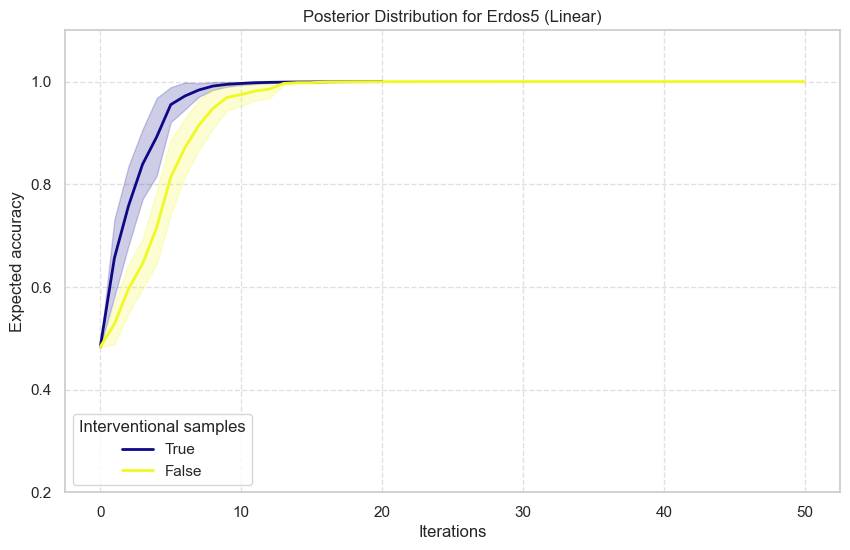

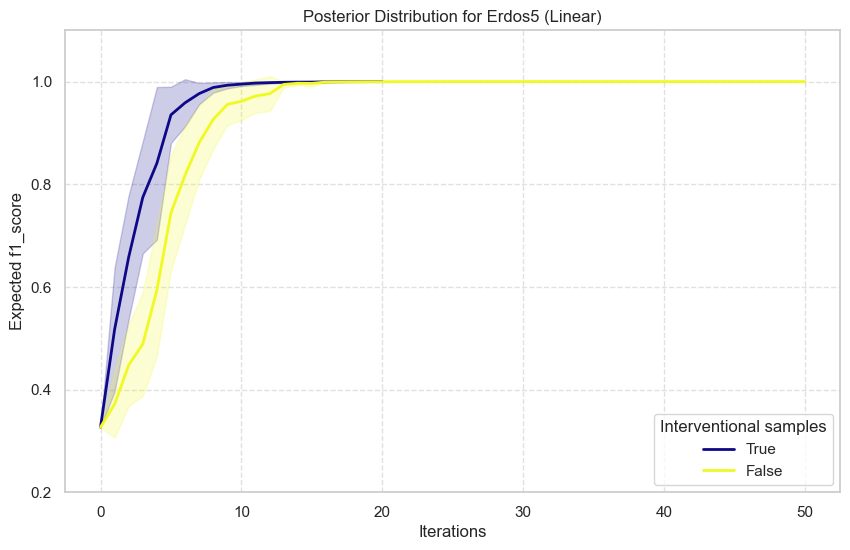

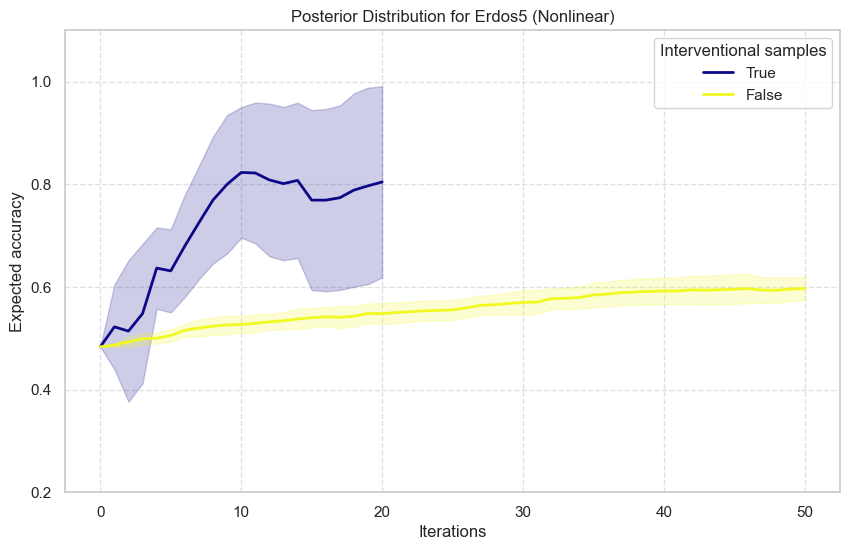

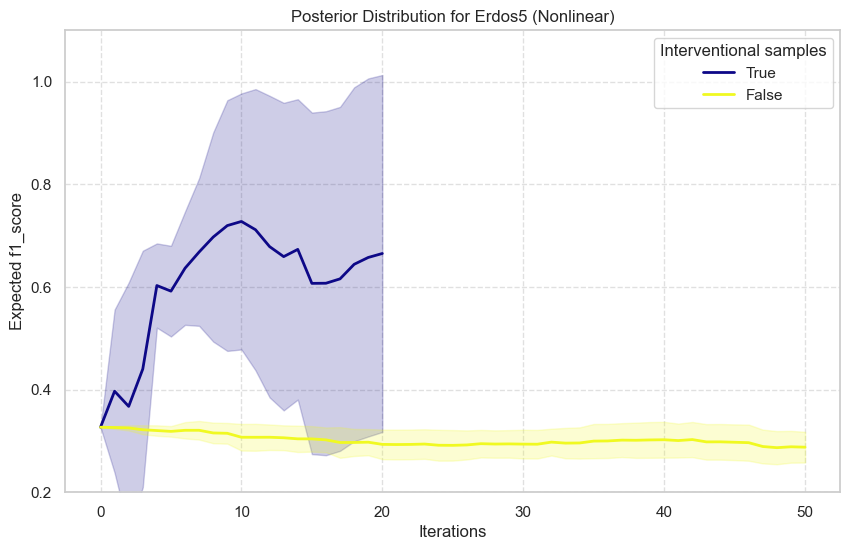

In [1]:
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/")

from results_erdos.results_utils import plot_posterior_obs_int
plot_posterior_obs_int("Erdos5", "accuracy", nonlinear=False)
plot_posterior_obs_int("Erdos5", "f1_score", nonlinear=False)
plot_posterior_obs_int("Erdos5", "accuracy", nonlinear=True)
plot_posterior_obs_int("Erdos5", "f1_score", nonlinear=True)

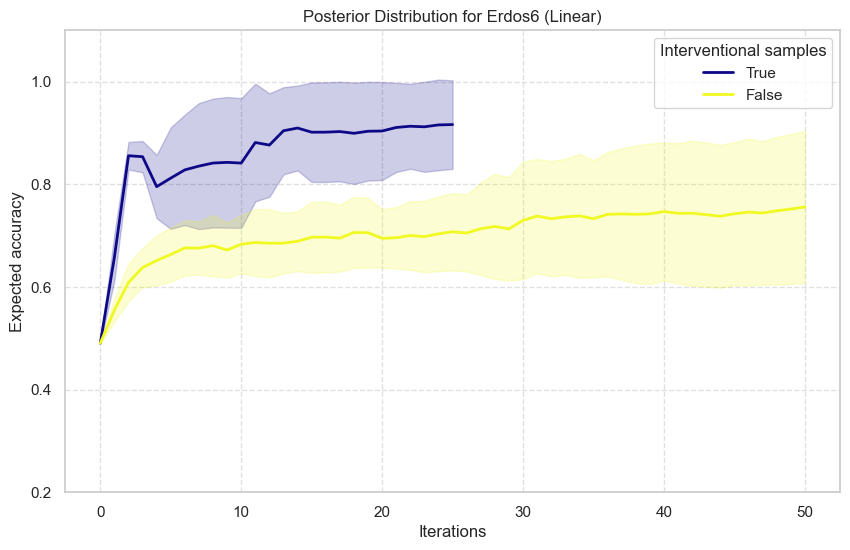

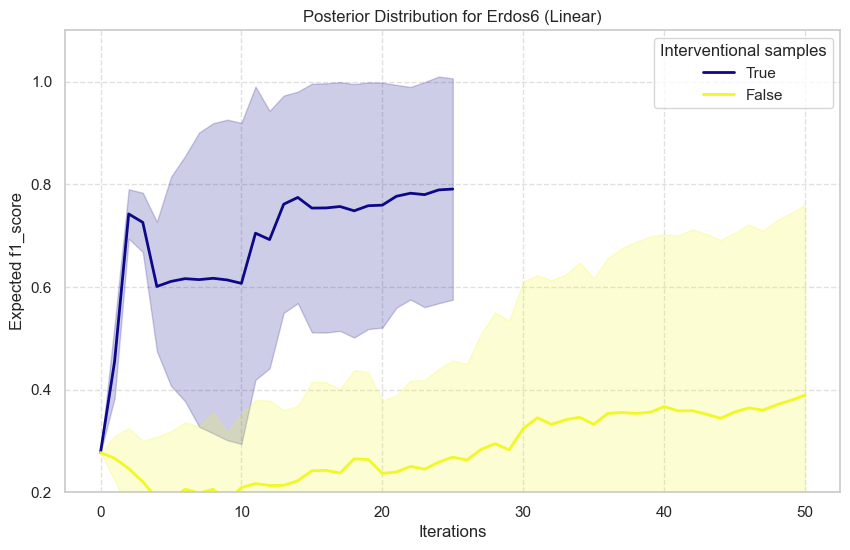

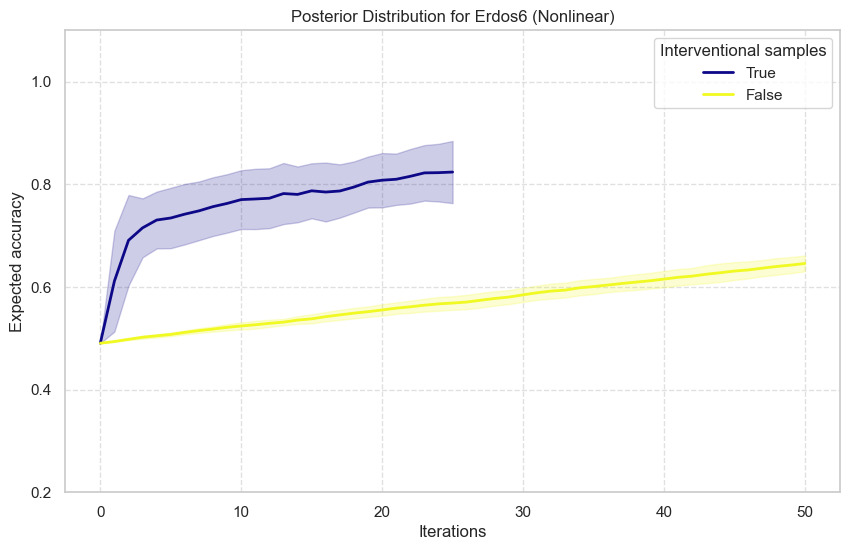

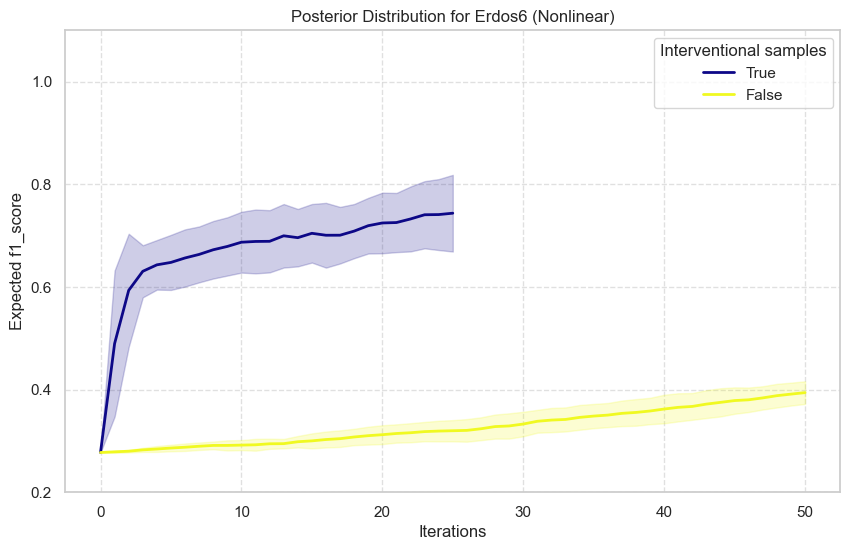

In [2]:
plot_posterior_obs_int("Erdos6", "accuracy", nonlinear=False)
plot_posterior_obs_int("Erdos6", "f1_score", nonlinear=False)
plot_posterior_obs_int("Erdos6", "accuracy", nonlinear=True)
plot_posterior_obs_int("Erdos6", "f1_score", nonlinear=True)

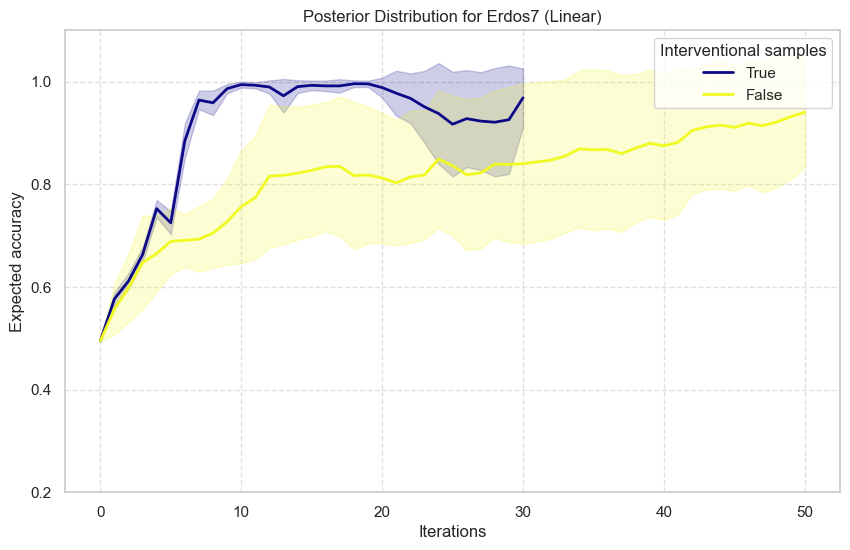

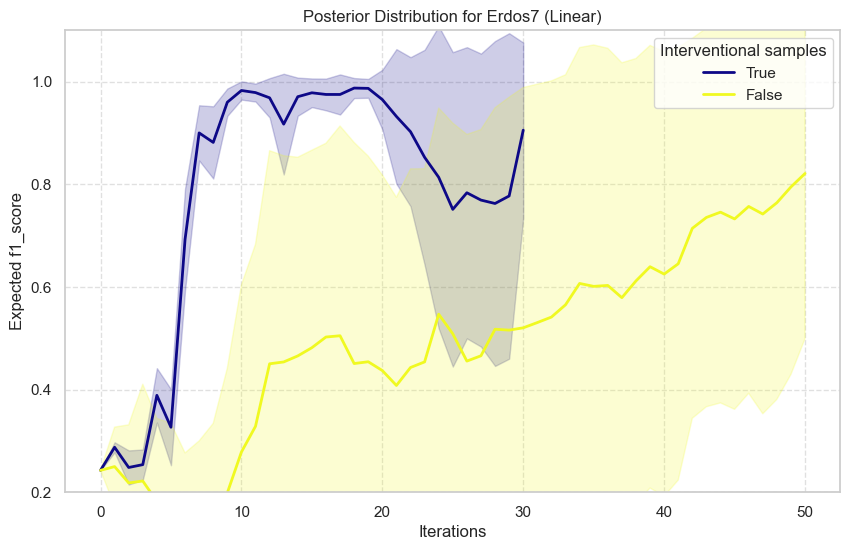

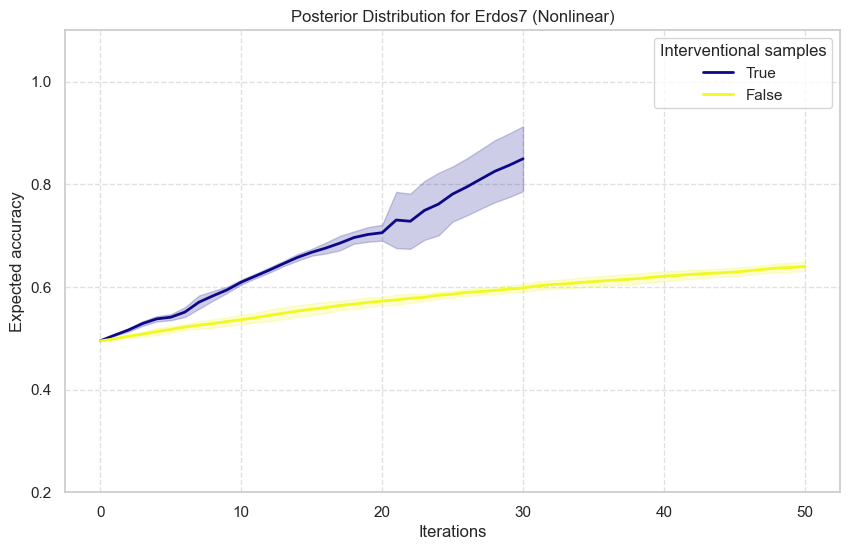

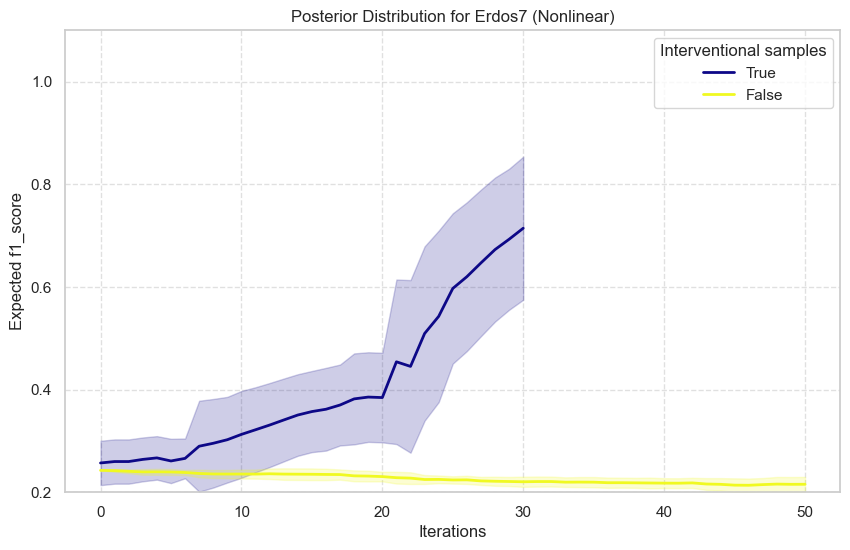

In [3]:
plot_posterior_obs_int("Erdos7", "accuracy", nonlinear=False)
plot_posterior_obs_int("Erdos7", "f1_score", nonlinear=False)
plot_posterior_obs_int("Erdos7", "accuracy", nonlinear=True)
plot_posterior_obs_int("Erdos7", "f1_score", nonlinear=True)

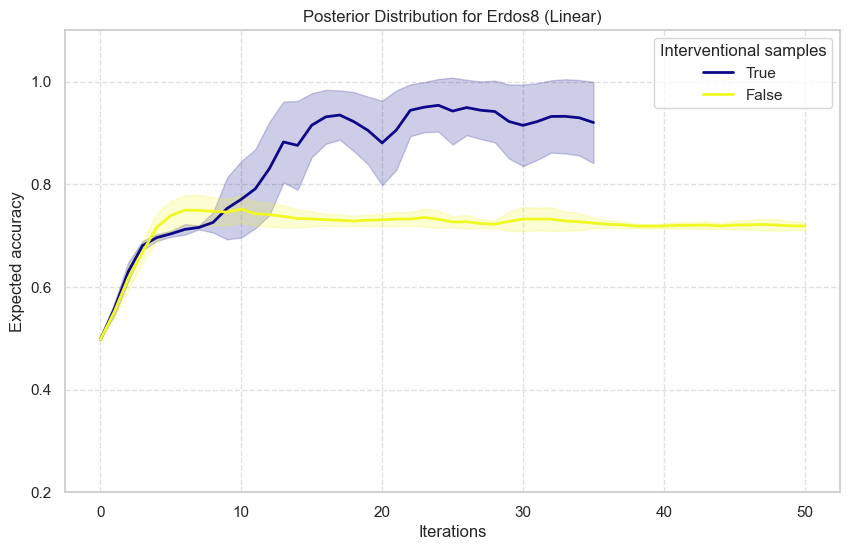

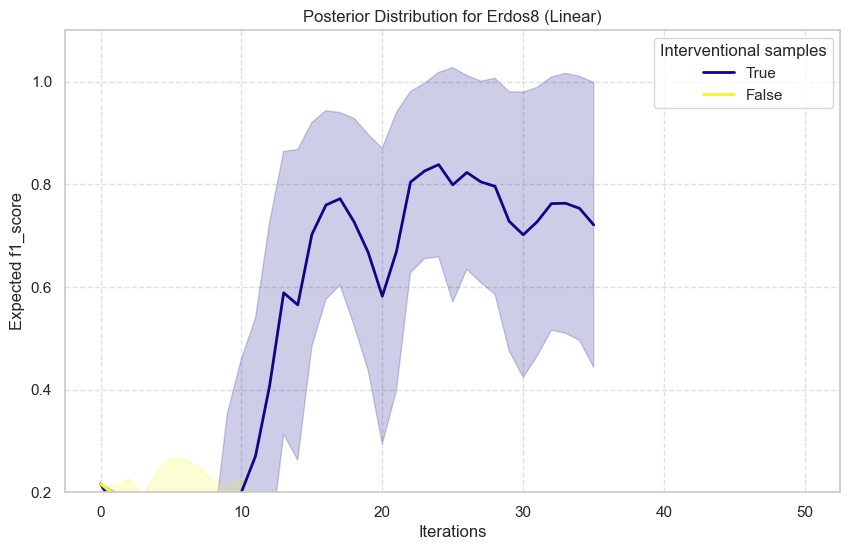

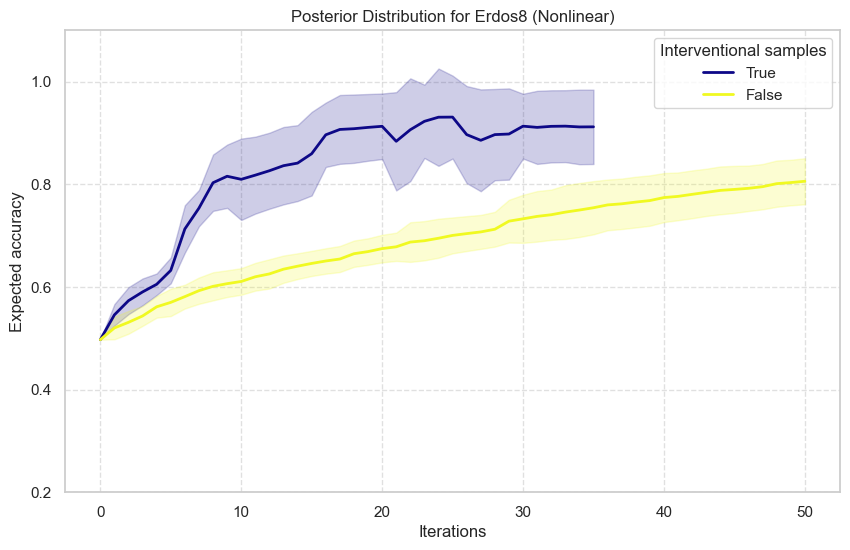

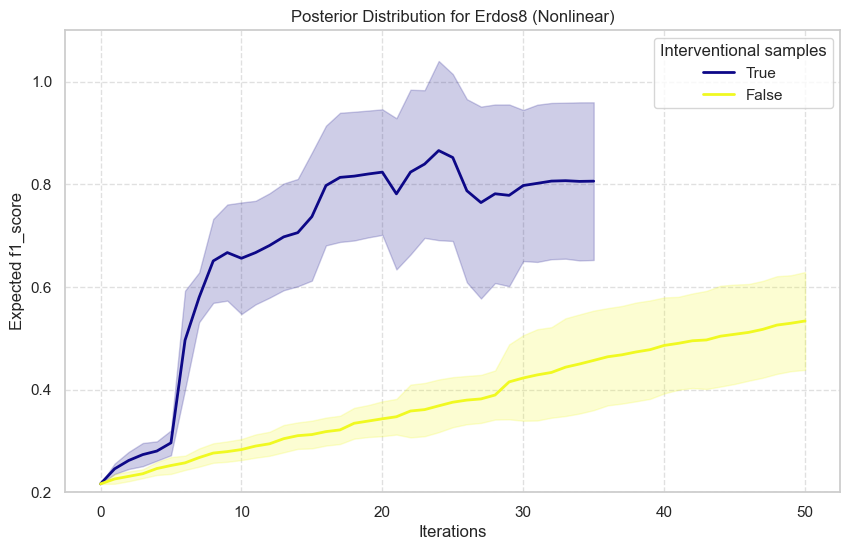

In [4]:
plot_posterior_obs_int("Erdos8", "accuracy", nonlinear=False)
plot_posterior_obs_int("Erdos8", "f1_score", nonlinear=False)
plot_posterior_obs_int("Erdos8", "accuracy", nonlinear=True)
plot_posterior_obs_int("Erdos8", "f1_score", nonlinear=True)

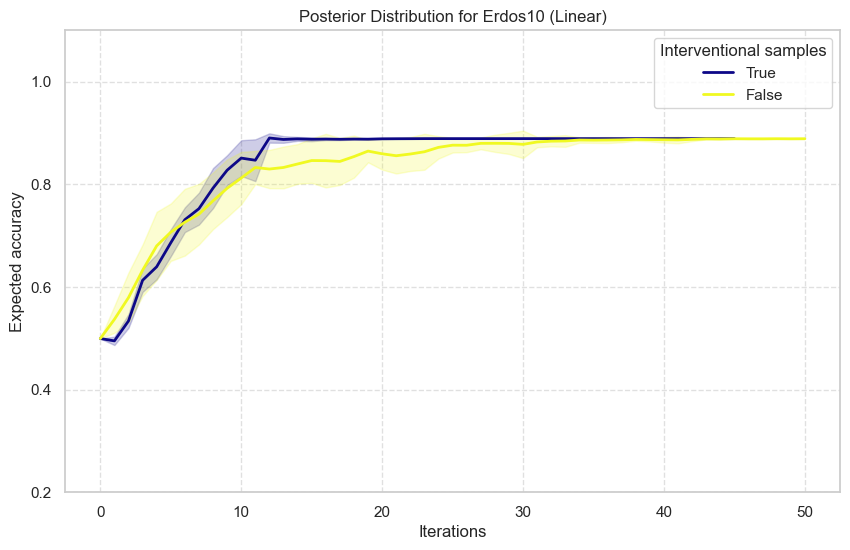

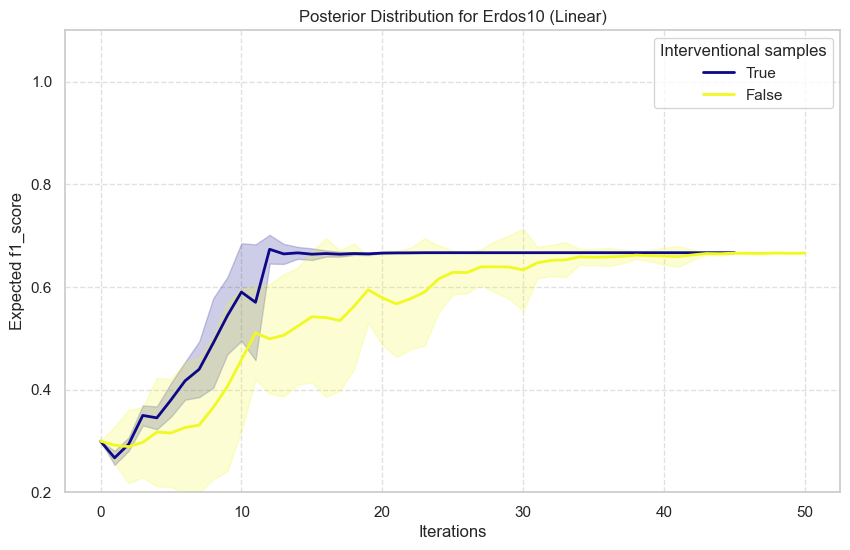

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (11,) + inhomogeneous part.

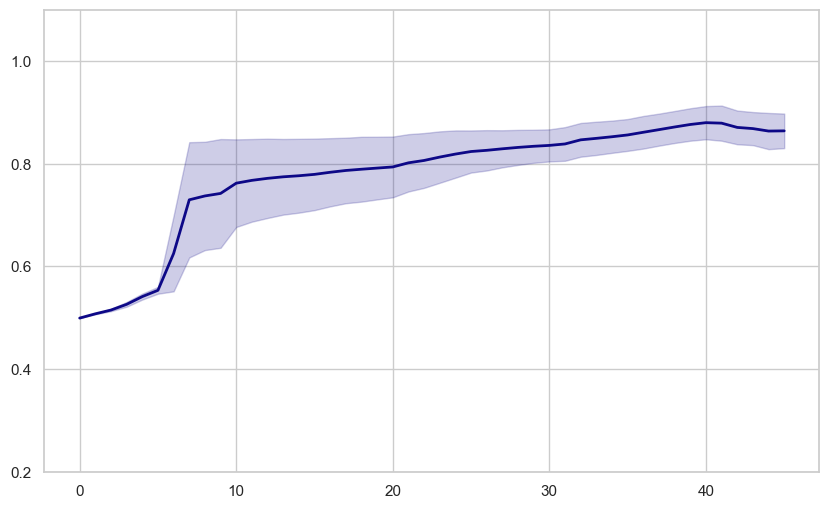

In [5]:
plot_posterior_obs_int("Erdos10", "accuracy", nonlinear=False)
plot_posterior_obs_int("Erdos10", "f1_score", nonlinear=False)
plot_posterior_obs_int("Erdos10", "accuracy", nonlinear=True)
plot_posterior_obs_int("Erdos10", "f1_score", nonlinear=True)

# Increasing noise

In [6]:
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/")

from results_erdos.results_utils import plot_posterior_noise

.*_nonlinear_200_nint_dr_D_1000_p_1_noise_0.1
.*_nonlinear_200_nint_dr_D_1000_p_1_noise_1.0
.*_nonlinear_200_nint_dr_D_1000_p_1_noise_2.0
.*_nonlinear_200_nint_dr_D_1000_p_1_noise_3.0


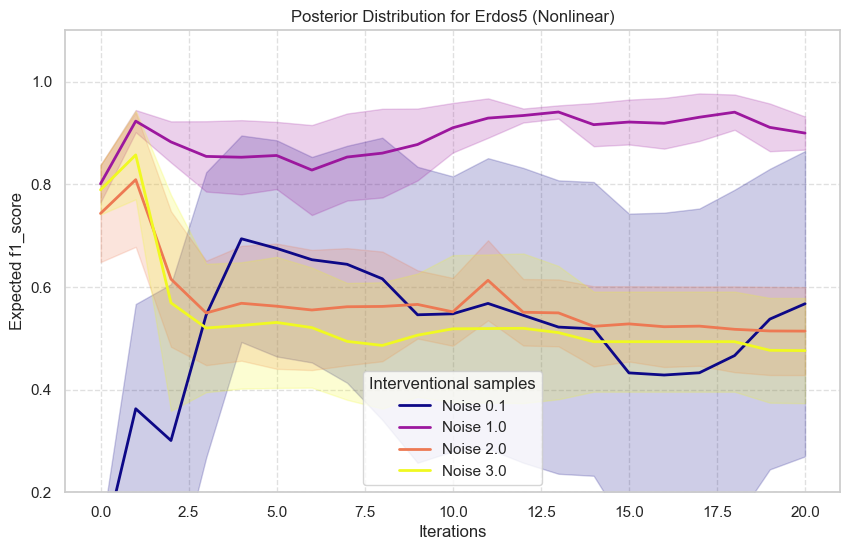

In [7]:
plot_posterior_noise("Erdos5", "f1_score", nonlinear=True, noise_list=[0.1, 1.0, 2.0, 3.0])

.*_nonlinear_200_nint_dr_D_1000_p_1_noise_0.1
.*_nonlinear_200_nint_dr_D_1000_p_1_noise_1.0
.*_nonlinear_200_nint_dr_D_1000_p_1_noise_2.0
.*_nonlinear_200_nint_dr_D_1000_p_1_noise_3.0


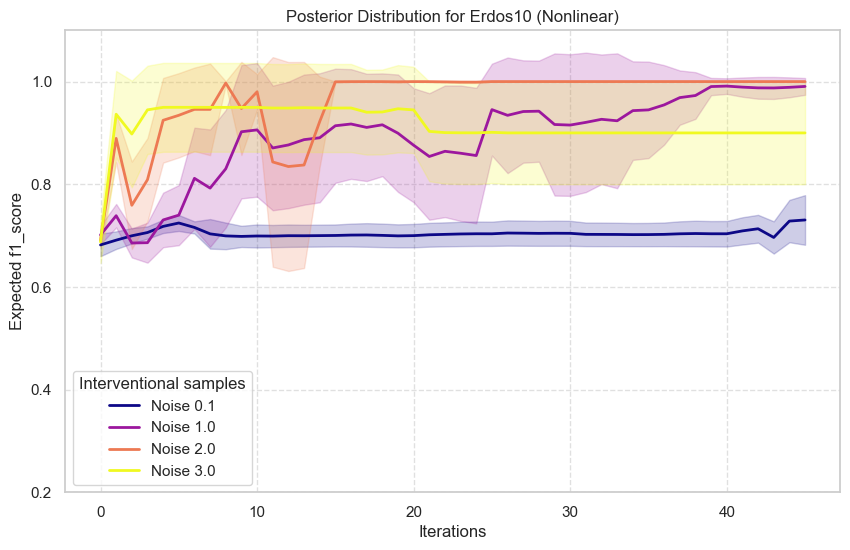

In [9]:
plot_posterior_noise("Erdos10", "f1_score", nonlinear=True, noise_list=[0.1, 1.0, 2.0, 3.0])

.*_nonlinear_200_nint_dr_D_1000_p_1_noise_0.1
.*_nonlinear_200_nint_dr_D_1000_p_1_noise_1.0
.*_nonlinear_200_nint_dr_D_1000_p_1_noise_2.0
.*_nonlinear_200_nint_dr_D_1000_p_1_noise_3.0


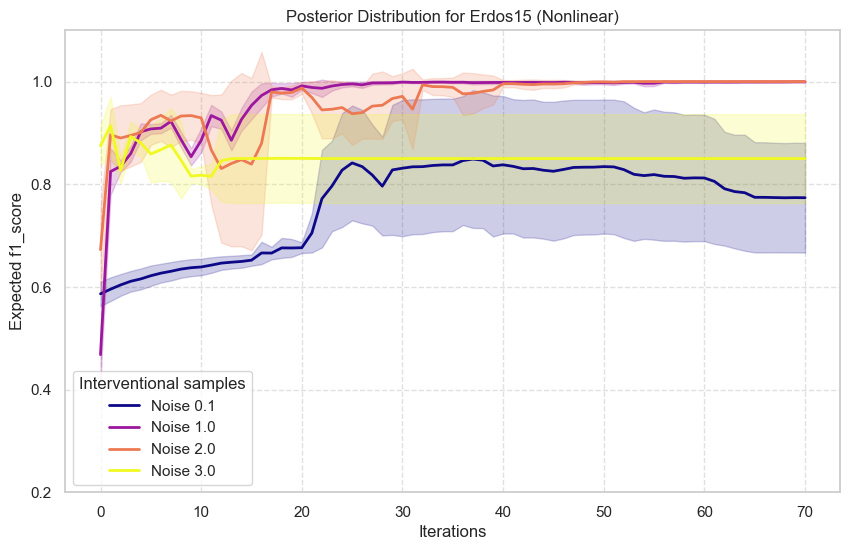

In [10]:
plot_posterior_noise("Erdos15", "f1_score", nonlinear=True, noise_list=[0.1, 1.0, 2.0, 3.0])

# Including doubly robust

In [ ]:
import pickle
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/")
with open("results/posterior/Erdos8/run1_nonlinear_200_D_1000_p_1_noise_None.pickle", "rb") as file:
    results = pickle.load(file)

print(results)

{'accuracy': [0.4971878515185602, 0.5002555687269203, 0.5035875842573967, 0.5054448533204303, 0.5291291477811736, 0.5319346817654367, 0.5407394663800829, 0.5433278831318061, 0.5590045285758071, 0.5615445576386718, 0.5742383528800395, 0.5784231735695141, 0.5925350204908735, 0.5958051867118666, 0.6022445332934578, 0.6107908873576058, 0.6210902330442165, 0.6243695228190776, 0.6316720588875112, 0.6342536149921063, 0.6361593316547096, 0.6434965039377574, 0.6475043991555672, 0.6475665282673368, 0.6548497397355231, 0.6553634092841467, 0.6570665473665551, 0.6608612659190525, 0.6621549884693556, 0.6638203477317333, 0.6673437297063319, 0.6725534842331339, 0.6758482840601489, 0.6801483847258262, 0.6811388998220647, 0.6841190859382875, 0.6884644750020408, 0.6900343923604209, 0.6918242650189743, 0.6927718959732648, 0.6967825813286171, 0.6984435951916445, 0.7025966149388755, 0.707297534316799, 0.710990537241411, 0.7134374597332674, 0.7141000658749979, 0.7159363316839896, 0.7229087489621112, 0.723715

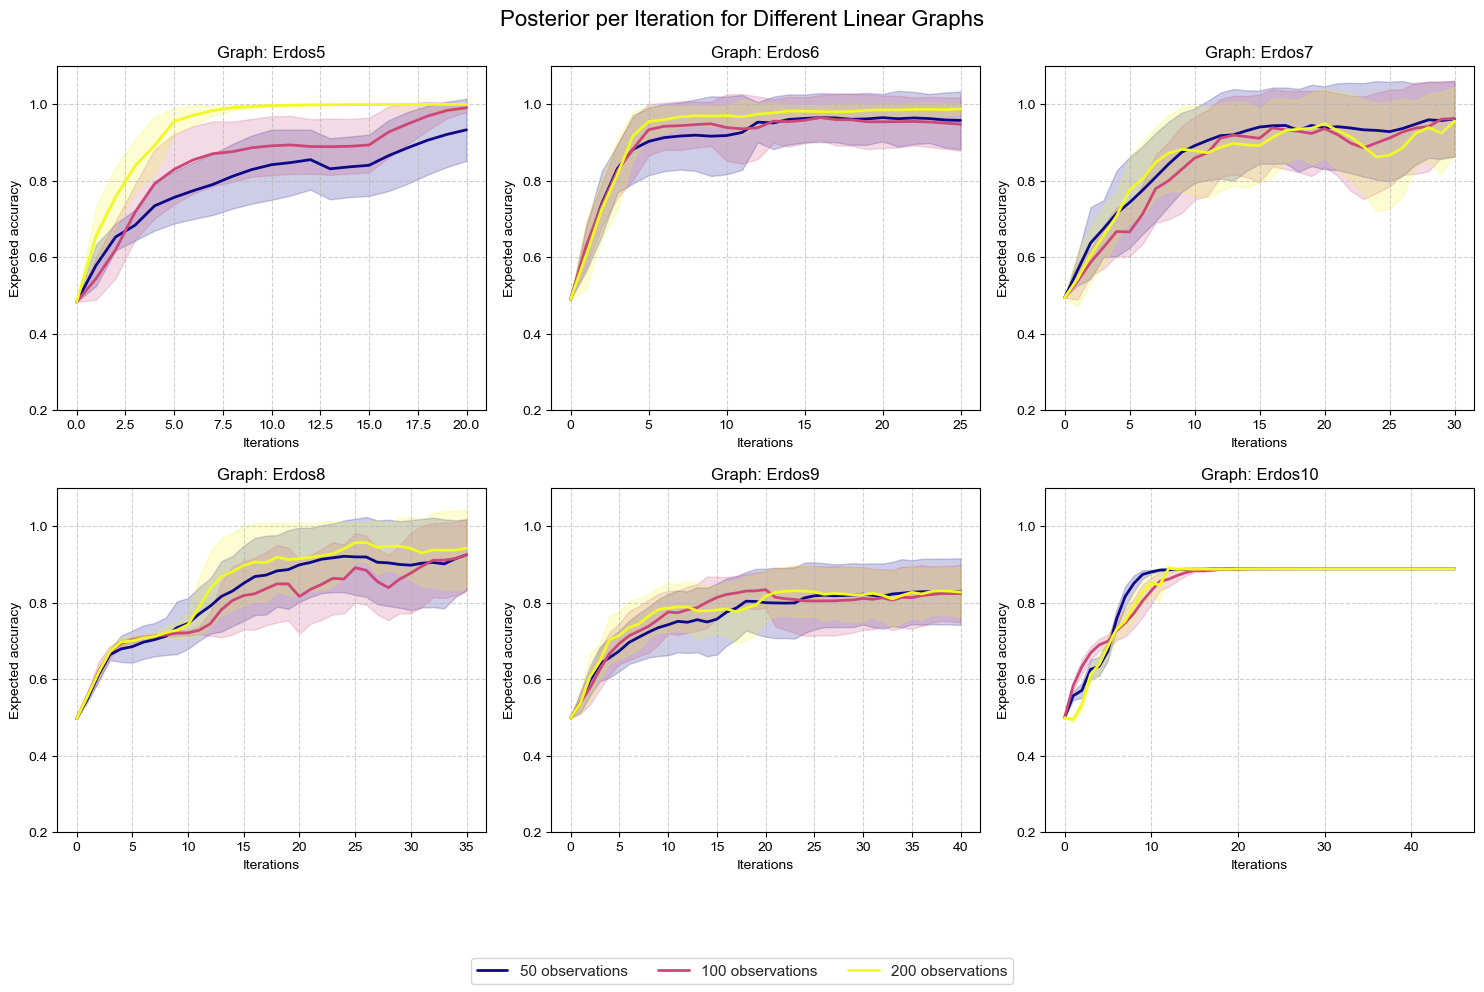

In [1]:
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/")
from results_utils import observational_dataset_posterior_per_iteration
observational_dataset_posterior_per_iteration()

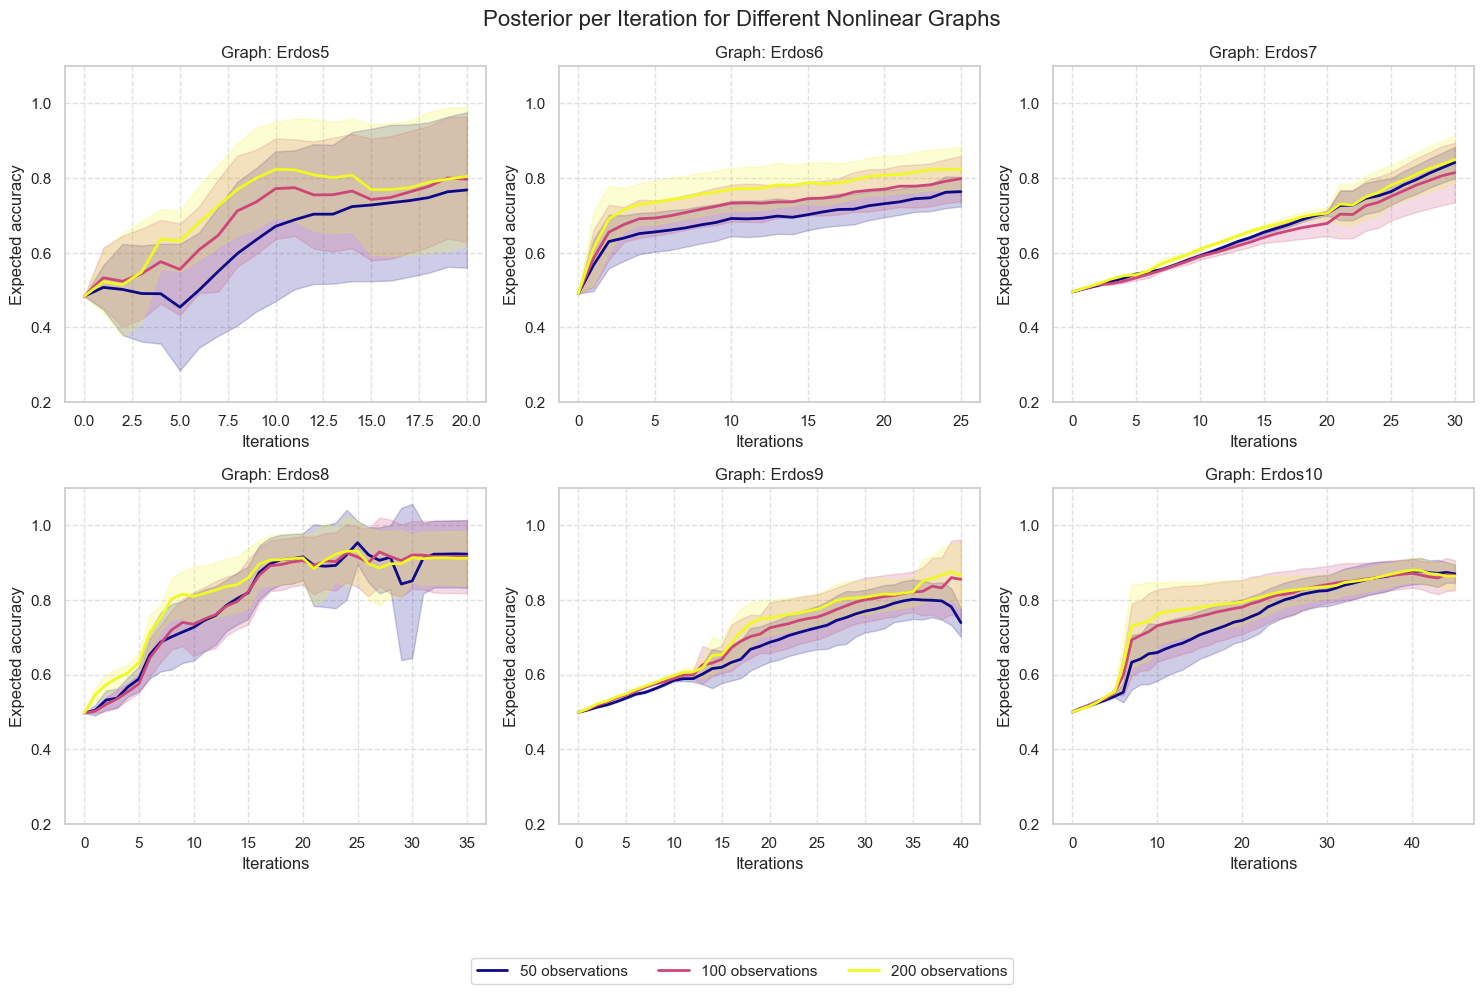

In [2]:
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/")
from results_utils import observational_dataset_posterior_per_iteration
observational_dataset_posterior_per_iteration(nonlinear=True)